# Aula 5 - KNN e ferramentas especiais

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Ferramentas Especiais
- 2) KNN para regressão

____
____
____

## Exercício da aula passada

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, r2_score

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score

In [3]:
df = pd.read_csv("../datasets/insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df['target'] = np.where(df['charges'] < 10000, 0, np.where(df['charges'] < 30000, 1, 2))

In [7]:
df['flag_sex'] = np.where(df['sex'] == 'female', 1, 0)

In [8]:
df['is_smoker'] = np.where(df['smoker'] == 'yes', 1, 0)

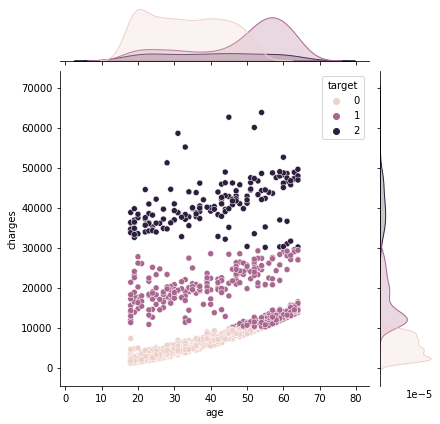

In [10]:
sns.jointplot(data=df, x='age', y='charges', hue='target')

In [11]:
X = df.drop(['charges', 'target', 'sex', 'smoker', 'region'], axis = 1)
y = df["target"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=10)

model.fit(X_train_std, y_train)

y_pred = model.predict(X_test_std)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       143
           1       0.89      0.75      0.81        93
           2       0.96      0.84      0.90        32

    accuracy                           0.88       268
   macro avg       0.90      0.85      0.87       268
weighted avg       0.88      0.88      0.87       268



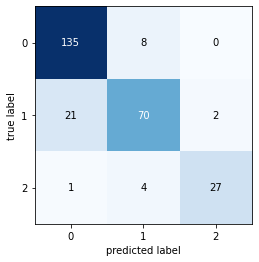

In [16]:
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

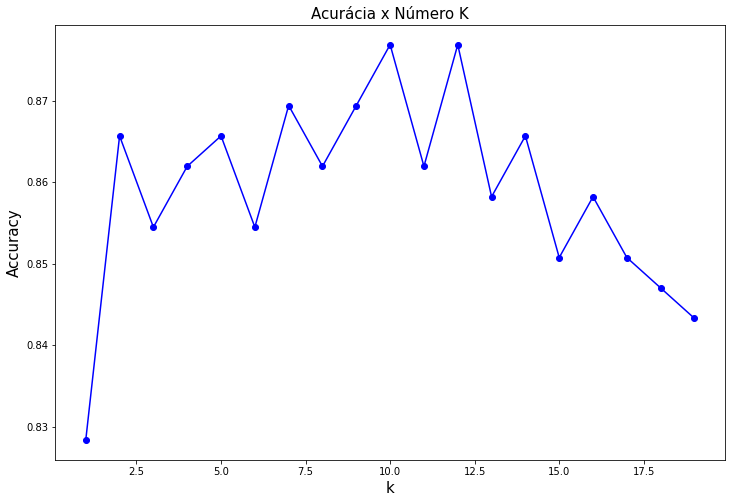

Melhor k: 10


In [17]:
from sklearn.metrics import accuracy_score

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

ks = []
accuracys = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)
    acc = accuracy_score(y_test, y_pred)
    accuracys.append(acc)
    ks.append(k)

plt.figure(figsize=(12,8))
plt.plot(ks, accuracys, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('Acurácia x Número K', fontsize = 15)
plt.show(True)
best_k = np.argmax(accuracys)+1
print('Melhor k:', best_k)

## 1) Ferramentas especiais

Vamos agora ver algumas ferramentas especiais do sklearn que nos ajudam no desenvolvimento de modelos!

### Pipeline

O [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) é uma estrutura que o sklearn proporciona a fim de garantir que possamos em uma única estrutura passar **o estimador e o transformador** (e muitas outras coisas). Para maiores informações, [clique aqui](https://scikit-learn.org/stable/modules/compose.html#pipeline). 

Vamos ver a seguir como esta estrutura funciona:

**Para o train-test split normal**

In [25]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns=["id", "diagnosis"])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)

In [26]:
lista_etapas = [('std_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=5))]

pipe = Pipeline(lista_etapas).fit(X_train, y_train)

In [28]:
y_pred = pipe.predict(X_test)

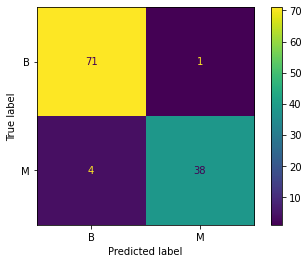

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

[[71  1]
 [ 4 38]]


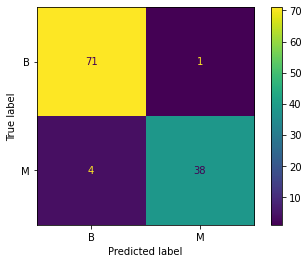

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


# ====================

[[284   1]
 [  9 161]]


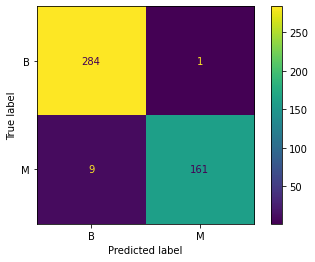

              precision    recall  f1-score   support

           B       0.97      1.00      0.98       285
           M       0.99      0.95      0.97       170

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455



In [30]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns=["id", "diagnosis"])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

# argumento: um lista de tuplas do tipo [("nome da estrutura", classe instanciada da estrutura)]
# na sequencia em que as estruturas (procedimentos) são aplicadas
lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier(n_neighbors=5))]

pipe = Pipeline(lista_etapas).fit(X_train, y_train)

# ====================

y_pred_test = pipe.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

y_pred_train = pipe.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

**Para a validação cruzada**

Isso resolve o problema que tivemos na última aula de vazamento de dados na validação cruzada!

In [32]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns=["id", "diagnosis"])
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier(n_neighbors=5))]

pipe = Pipeline(lista_etapas)

In [35]:
grupo = KFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

results = cross_validate(estimator=pipe,
                        X=X_train, y=y_train,
                        cv=grupo,
                        scoring=metrica,
                        return_train_score=True)

In [39]:
df_results = pd.DataFrame(results)

df_results.describe()

,fit_time,score_time,test_score,train_score
count,10.000000,10.000000,10.000000,10.000000
mean,0.003599,0.003702,0.908978,0.943073
std,0.000842,0.000825,0.061916,0.007991
min,0.002997,0.002995,0.750000,0.933333
25%,0.003000,0.003000,0.900000,0.934318
50%,0.003001,0.003500,0.926768,0.946667
75%,0.003996,0.004021,0.949342,0.949606
max,0.004999,0.005002,0.956522,0.952381


In [19]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns=["id", "diagnosis"])
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier(n_neighbors=5))]

pipe = Pipeline(lista_etapas)

# ====================

grupo = KFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

results = cross_validate(estimator=pipe,
                         X=X_train, y=y_train,
                         cv=grupo,
                         scoring=metrica,
                         return_train_score=True)

df_results = pd.DataFrame(results)

In [20]:
df_results

,fit_time,score_time,test_score,train_score
0,0.005057,0.004656,0.900000,0.950000
1,0.005189,0.007137,0.956522,0.945578
2,0.004678,0.000000,0.950000,0.946667
3,0.005193,0.000219,1.000000,0.934211
4,0.007322,0.002075,0.909091,0.949686
5,0.005448,0.005011,0.900000,0.940000
6,0.004826,0.000000,0.900000,0.946667
7,0.005046,0.004817,0.882353,0.941176
8,0.004545,0.005233,0.750000,0.949367
9,0.000000,0.009777,0.947368,0.933775


In [21]:
# com isso, resolvemos os problemas que tínhamos anteriormente de vazamento 
# de dados no crossvalidation! essa distribuição é bem mais confiável!!
df_results.describe()

,fit_time,score_time,test_score,train_score
count,10.000000,10.000000,10.000000,10.000000
mean,0.004730,0.003892,0.909533,0.943713
std,0.001834,0.003279,0.066603,0.006123
min,0.000000,0.000000,0.750000,0.933775
25%,0.004715,0.000683,0.900000,0.940294
50%,0.005051,0.004736,0.904545,0.946122
75%,0.005192,0.005177,0.949342,0.948692
max,0.007322,0.009777,1.000000,0.950000


Uma boa ideia é usar o [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html), pois ele mantém a estratificação do target dentro de cada split!

Isso é sobretudo importante pra dados desbalanceados (no target)

In [40]:
from sklearn.model_selection import StratifiedKFold

In [41]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns="diagnosis")
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier(n_neighbors=5))]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

results = cross_validate(estimator=pipe,
                         X=X_train, y=y_train,
                         cv=grupo,
                         scoring=metrica,
                         return_train_score=True)

df_results = pd.DataFrame(results)

In [43]:
df_results.describe()

,fit_time,score_time,test_score,train_score
count,10.000000,10.000000,10.000000,10.000000
mean,0.003527,0.004916,0.911765,0.945098
std,0.004815,0.005183,0.100938,0.008267
min,0.000000,0.000000,0.705882,0.934641
25%,0.000000,0.000000,0.838235,0.941176
50%,0.000000,0.004803,0.941176,0.944444
75%,0.008538,0.009805,1.000000,0.947712
max,0.010656,0.010083,1.000000,0.960784


## Exercício

1 - Vamos revisitar o dataset de House Prices, utilizado na aula 3. Lá, tinhamos um impedimento, a ausência do pipeline impedia o uso do cross_validate com o escalonamento (e os campos precisavam de escalonamento dada a discrepância de valores.)

#### Passo a passo

1 - Faça a leitura do dataset e escolha as features

2 - Efetue o train test split

3 - Defina as etapas do pipeline

4 - Instancie o pipeline

5 - Faça a divisão dos folds

6 - Chame o cross_validate

7 - avalie os resultados

In [43]:
from sklearn.linear_model import ElasticNet

In [44]:
house_prices = pd.read_csv('house_prices.csv')

In [55]:
house_prices_filtered.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.021937,-0.013289,-0.040711,-0.058269,0.004387,-0.020862,-0.027664,-0.073472,-0.013751,...,-0.025060,-0.001972,0.009935,-0.066833,0.015183,0.048010,0.045799,-0.000570,0.013407,-0.047122
MSSubClass,0.021937,1.000000,-0.386940,-0.198096,0.029522,-0.087859,0.025800,0.006645,0.040240,-0.070389,...,-0.017988,0.004054,-0.017790,-0.039739,-0.021789,0.003166,-0.040689,-0.027170,-0.012448,-0.088032
LotFrontage,-0.013289,-0.386940,1.000000,0.421184,0.241322,-0.046312,0.109726,0.086414,0.189969,0.241352,...,0.082166,0.161815,0.014261,0.069716,0.035906,0.211746,0.001471,0.018815,0.013267,0.344270
LotArea,-0.040711,-0.198096,0.421184,1.000000,0.167525,-0.034348,0.029205,0.026848,0.106115,0.230441,...,0.133576,0.099170,-0.023631,0.012520,0.072517,0.109147,0.012790,0.008998,-0.006904,0.299962
OverallQual,-0.058269,0.029522,0.241322,0.167525,1.000000,-0.163157,0.589385,0.570757,0.423988,0.249500,...,0.282512,0.340679,-0.144344,0.017331,0.055296,0.080131,-0.062064,0.079895,-0.008903,0.797881
OverallCond,0.004387,-0.087859,-0.046312,-0.034348,-0.163157,1.000000,-0.426462,0.039402,-0.166762,-0.054788,...,-0.010835,-0.076273,0.062748,-0.006861,0.087030,-0.023566,0.119772,-0.014236,0.041003,-0.124391
YearBuilt,-0.020862,0.025800,0.109726,0.029205,0.589385,-0.426462,1.000000,0.623171,0.332190,0.236941,...,0.238548,0.235432,-0.392693,0.027948,-0.063694,0.006717,-0.096973,0.013784,-0.004585,0.525394
YearRemodAdd,-0.027664,0.006645,0.086414,0.026848,0.570757,0.039402,0.623171,1.000000,0.193376,0.120774,...,0.244602,0.260521,-0.214115,0.026304,-0.034288,0.019307,-0.040420,0.026884,0.041302,0.521253
MasVnrArea,-0.073472,0.040240,0.189969,0.106115,0.423988,-0.166762,0.332190,0.193376,1.000000,0.285331,...,0.174649,0.129532,-0.116832,0.022331,0.052646,0.021648,-0.054044,0.015850,-0.017569,0.488658
BsmtFinSF1,-0.013751,-0.070389,0.241352,0.230441,0.249500,-0.054788,0.236941,0.120774,0.285331,1.000000,...,0.206246,0.127900,-0.105410,0.021831,0.059635,0.194349,0.003027,-0.015281,0.010224,0.390301


In [46]:
house_prices_filtered = house_prices.select_dtypes(include='number')
house_prices_filtered = house_prices_filtered.dropna()

In [48]:
X = house_prices_filtered.drop(columns=['Id', 'SalePrice'])
y = house_prices_filtered['SalePrice']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2, random_state=42)

In [50]:
lista_etapas = [("std_scaler", StandardScaler()),
                ("en", ElasticNet())]

pipe = Pipeline(lista_etapas)

In [52]:
metrica = make_scorer(r2_score)

grupo = KFold(n_splits = 10)

results = cross_validate(estimator=pipe,
                        X=X_train, y=y_train,
                        cv=grupo,
                        scoring=metrica,
                        return_train_score=True)

df_results = pd.DataFrame(results)

In [53]:
df_results.describe()

,fit_time,score_time,test_score,train_score
count,10.000000,10.000000,10.000000,10.000000
mean,0.004968,0.001899,0.720054,0.791961
std,0.000699,0.000316,0.258138,0.016997
min,0.003999,0.001000,0.007897,0.777839
25%,0.004996,0.001998,0.725421,0.783081
50%,0.005000,0.001999,0.819037,0.784993
75%,0.005002,0.002000,0.836907,0.797008
max,0.006545,0.002004,0.867483,0.835138


### Gridsearch

O [Gridsearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) é uma estrutura que o sklearn proporciona para que seja feita **a busca exaustiva de hiperparâmetros de um estimador**.

Na prática, o que o gridsearch faz é **treinar diversos modelos com diferentes combinações de hiperparâmetros**, de modo a manter o melhor deles como o modelo final, tudo automaticamente! 

Tudo o que precisamos fazer é indicar quais os hiperparâmetros que queremos procurar: a **grade**!

<img src="https://www.yourdatateacher.com/wp-content/uploads/2021/03/image-6.png" width=500>

É muito comum também passarmos o **Pipeline** como argumento do gridsearch!

Para maiores informações, [clique aqui](https://scikit-learn.org/stable/modules/grid_search.html#grid-search). 

Vamos ver a seguir como esta estrutura funciona:

O Gridsearch avalia o melhor modelo segundo a métrica que passamos em `scoring`. [Clique aqui](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) para ver as métricas disponíveis por padrão.

Mas o GS vai além: ele não calcula a métrica uma única vez, mas sim **várias vezes**, conforme especificado pelo parâmetro `cv`. No fim, o melhor modelo é o que tem o melhor scoring **médio** entre as vezes que é calculado.

O "cv" quer dizer **Cross Validation**, o método mais seguro de realizar um treinamento e avaliação de um modelo que conhecemos na aula passada!

<img src="https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600> 

Com a validação cruzada, garantimos uma avaliação justa de cada um dos modelos candidatos (cada um construído com uma combinação diferente de hiperparâmetros).

Assim, sabemos que a melhor combinação de hiperparâmetros a ser encontrada não estará de qualquer forma "overfitada" em particularidades da base de treino!

Vamos colocar tudo em uma única célula:

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
from sklearn.metrics import f1_score

In [58]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns=['id',"diagnosis"])
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

In [59]:
param_grid = {"knn__weights": ['uniform', 'distance'],
              'knn__metric': ['manhattan', 'euclidean', 'mitkowski'],
              'knn__n_neighbors' : range(2, 31)} ## no grid temos string do nome do pipeline, __ (dois underscores) e depois faixa de variação

In [60]:
## verbose é pra que ele exiba o que está acontecendo por baixo dos panos
grid_knn = GridSearchCV(estimator = pipe,
                       param_grid = param_grid,
                       scoring = metrica,
                       cv = splitter,
                       verbose=10)

In [61]:
grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 174 candidates, totalling 1740 fits
[CV 1/10; 1/174] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/174] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 1/174] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/174] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 3/10; 1/174] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/174] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 1/174] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/174] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 1/174] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 5/10; 1/174] END knn__me

[CV 10/10; 5/174] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 1/10; 6/174] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance
[CV 1/10; 6/174] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 6/174] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance
[CV 2/10; 6/174] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 3/10; 6/174] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance
[CV 3/10; 6/174] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 6/174] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance
[CV 4/10; 6/174] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 6/174] START knn__metric=manhattan, knn__n_

[CV 7/10; 10/174] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 10/174] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 8/10; 10/174] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 10/174] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 9/10; 10/174] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 10/174] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 10/10; 10/174] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 1/10; 11/174] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 1/10; 11/174] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 2/10; 11/174] START knn__metric=manhatta

[CV 4/10; 15/174] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 15/174] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 5/10; 15/174] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 6/10; 15/174] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 6/10; 15/174] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 15/174] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 7/10; 15/174] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 15/174] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 8/10; 15/174] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 15/174] START knn__metric=manhattan, knn__n

[CV 10/10; 19/174] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 20/174] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 1/10; 20/174] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 2/10; 20/174] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 2/10; 20/174] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 20/174] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 3/10; 20/174] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 20/174] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 4/10; 20/174] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 20/174] START knn__metric

[CV 8/10; 24/174] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 8/10; 24/174] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 24/174] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 9/10; 24/174] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 24/174] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 10/10; 24/174] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 25/174] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform
[CV 1/10; 25/174] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 25/174] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform
[CV 2/10; 25/174] END knn__metric=manhattan, knn__n_neighbors=14, k

[CV 2/10; 29/174] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 29/174] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 3/10; 29/174] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 29/174] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 4/10; 29/174] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 29/174] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 5/10; 29/174] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 6/10; 29/174] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 6/10; 29/174] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 29/174] START knn__metric=manhatta

[CV 1/10; 34/174] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 2/10; 34/174] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 2/10; 34/174] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 34/174] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 3/10; 34/174] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 34/174] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 4/10; 34/174] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 34/174] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 5/10; 34/174] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 6/10; 34/174] START knn__metric

[CV 7/10; 38/174] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 38/174] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 8/10; 38/174] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 38/174] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 9/10; 38/174] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 38/174] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 10/10; 38/174] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 39/174] START knn__metric=manhattan, knn__n_neighbors=21, knn__weights=uniform
[CV 1/10; 39/174] END knn__metric=manhattan, knn__n_neighbors=21, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 39/174] START knn__metric

[CV 4/10; 43/174] END knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 43/174] START knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform
[CV 5/10; 43/174] END knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 6/10; 43/174] START knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform
[CV 6/10; 43/174] END knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 43/174] START knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform
[CV 7/10; 43/174] END knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 43/174] START knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform
[CV 8/10; 43/174] END knn__metric=manhattan, knn__n_neighbors=23, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 9/10; 43/174] START knn__metric=manhatta

[CV 2/10; 48/174] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 48/174] START knn__metric=manhattan, knn__n_neighbors=25, knn__weights=distance
[CV 3/10; 48/174] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 48/174] START knn__metric=manhattan, knn__n_neighbors=25, knn__weights=distance
[CV 4/10; 48/174] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 48/174] START knn__metric=manhattan, knn__n_neighbors=25, knn__weights=distance
[CV 5/10; 48/174] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 6/10; 48/174] START knn__metric=manhattan, knn__n_neighbors=25, knn__weights=distance
[CV 6/10; 48/174] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 48/174] START knn__metric

[CV 7/10; 52/174] END knn__metric=manhattan, knn__n_neighbors=27, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 52/174] START knn__metric=manhattan, knn__n_neighbors=27, knn__weights=distance
[CV 8/10; 52/174] END knn__metric=manhattan, knn__n_neighbors=27, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 9/10; 52/174] START knn__metric=manhattan, knn__n_neighbors=27, knn__weights=distance
[CV 9/10; 52/174] END knn__metric=manhattan, knn__n_neighbors=27, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 10/10; 52/174] START knn__metric=manhattan, knn__n_neighbors=27, knn__weights=distance
[CV 10/10; 52/174] END knn__metric=manhattan, knn__n_neighbors=27, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 1/10; 53/174] START knn__metric=manhattan, knn__n_neighbors=28, knn__weights=uniform
[CV 1/10; 53/174] END knn__metric=manhattan, knn__n_neighbors=28, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 53/174] START knn__metric

[CV 6/10; 57/174] END knn__metric=manhattan, knn__n_neighbors=30, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 57/174] START knn__metric=manhattan, knn__n_neighbors=30, knn__weights=uniform
[CV 7/10; 57/174] END knn__metric=manhattan, knn__n_neighbors=30, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 57/174] START knn__metric=manhattan, knn__n_neighbors=30, knn__weights=uniform
[CV 8/10; 57/174] END knn__metric=manhattan, knn__n_neighbors=30, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 9/10; 57/174] START knn__metric=manhattan, knn__n_neighbors=30, knn__weights=uniform
[CV 9/10; 57/174] END knn__metric=manhattan, knn__n_neighbors=30, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 10/10; 57/174] START knn__metric=manhattan, knn__n_neighbors=30, knn__weights=uniform
[CV 10/10; 57/174] END knn__metric=manhattan, knn__n_neighbors=30, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 1/10; 58/174] START knn__metric=manhat

[CV 4/10; 62/174] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 62/174] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 5/10; 62/174] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 6/10; 62/174] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 6/10; 62/174] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 7/10; 62/174] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 7/10; 62/174] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 62/174] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 8/10; 62/174] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 62/174] START knn__metric=euclidea

[CV 3/10; 67/174] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 67/174] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 4/10; 67/174] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 67/174] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 5/10; 67/174] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 6/10; 67/174] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 6/10; 67/174] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 67/174] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 7/10; 67/174] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=0.706 total time=   0.0s
[CV 8/10; 67/174] START knn__metric=euclidean, knn__n

[CV 2/10; 72/174] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 72/174] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 3/10; 72/174] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 4/10; 72/174] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 4/10; 72/174] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 72/174] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 5/10; 72/174] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 6/10; 72/174] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 6/10; 72/174] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 7/10; 72/174] START knn__metric=euclidea

[CV 2/10; 77/174] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 77/174] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform
[CV 3/10; 77/174] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 77/174] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform
[CV 4/10; 77/174] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 77/174] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform
[CV 5/10; 77/174] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 6/10; 77/174] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform
[CV 6/10; 77/174] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 7/10; 77/174] START knn__metric=euclidea

[CV 10/10; 81/174] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 82/174] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 1/10; 82/174] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 2/10; 82/174] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 2/10; 82/174] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 82/174] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 3/10; 82/174] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 4/10; 82/174] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 4/10; 82/174] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 82/174] START knn__metric

[CV 9/10; 86/174] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 86/174] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 10/10; 86/174] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 87/174] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 1/10; 87/174] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 87/174] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 2/10; 87/174] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 87/174] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 3/10; 87/174] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 87/174] START knn__metric=euc

[CV 5/10; 91/174] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 6/10; 91/174] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 6/10; 91/174] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 91/174] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 7/10; 91/174] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 91/174] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 8/10; 91/174] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 91/174] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 9/10; 91/174] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 10/10; 91/174] START knn__metric=euclide

[CV 7/10; 96/174] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 96/174] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 8/10; 96/174] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 96/174] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 9/10; 96/174] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 96/174] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 10/10; 96/174] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 97/174] START knn__metric=euclidean, knn__n_neighbors=21, knn__weights=uniform
[CV 1/10; 97/174] END knn__metric=euclidean, knn__n_neighbors=21, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 97/174] START knn__metric

[CV 7/10; 101/174] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 101/174] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform
[CV 8/10; 101/174] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 9/10; 101/174] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform
[CV 9/10; 101/174] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 10/10; 101/174] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform
[CV 10/10; 101/174] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 102/174] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=distance
[CV 1/10; 102/174] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 2/10; 102/174] START knn__m

[CV 5/10; 106/174] END knn__metric=euclidean, knn__n_neighbors=25, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 6/10; 106/174] START knn__metric=euclidean, knn__n_neighbors=25, knn__weights=distance
[CV 6/10; 106/174] END knn__metric=euclidean, knn__n_neighbors=25, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 106/174] START knn__metric=euclidean, knn__n_neighbors=25, knn__weights=distance
[CV 7/10; 106/174] END knn__metric=euclidean, knn__n_neighbors=25, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 106/174] START knn__metric=euclidean, knn__n_neighbors=25, knn__weights=distance
[CV 8/10; 106/174] END knn__metric=euclidean, knn__n_neighbors=25, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 9/10; 106/174] START knn__metric=euclidean, knn__n_neighbors=25, knn__weights=distance
[CV 9/10; 106/174] END knn__metric=euclidean, knn__n_neighbors=25, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 106/174] START 

[CV 3/10; 111/174] END knn__metric=euclidean, knn__n_neighbors=28, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 111/174] START knn__metric=euclidean, knn__n_neighbors=28, knn__weights=uniform
[CV 4/10; 111/174] END knn__metric=euclidean, knn__n_neighbors=28, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 111/174] START knn__metric=euclidean, knn__n_neighbors=28, knn__weights=uniform
[CV 5/10; 111/174] END knn__metric=euclidean, knn__n_neighbors=28, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 6/10; 111/174] START knn__metric=euclidean, knn__n_neighbors=28, knn__weights=uniform
[CV 6/10; 111/174] END knn__metric=euclidean, knn__n_neighbors=28, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 111/174] START knn__metric=euclidean, knn__n_neighbors=28, knn__weights=uniform
[CV 7/10; 111/174] END knn__metric=euclidean, knn__n_neighbors=28, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 111/174] START knn__metri

[CV 9/10; 115/174] END knn__metric=euclidean, knn__n_neighbors=30, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 10/10; 115/174] START knn__metric=euclidean, knn__n_neighbors=30, knn__weights=uniform
[CV 10/10; 115/174] END knn__metric=euclidean, knn__n_neighbors=30, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 1/10; 116/174] START knn__metric=euclidean, knn__n_neighbors=30, knn__weights=distance
[CV 1/10; 116/174] END knn__metric=euclidean, knn__n_neighbors=30, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 2/10; 116/174] START knn__metric=euclidean, knn__n_neighbors=30, knn__weights=distance
[CV 2/10; 116/174] END knn__metric=euclidean, knn__n_neighbors=30, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 116/174] START knn__metric=euclidean, knn__n_neighbors=30, knn__weights=distance
[CV 3/10; 116/174] END knn__metric=euclidean, knn__n_neighbors=30, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 116/174] START kn

[CV 4/10; 122/174] END knn__metric=mitkowski, knn__n_neighbors=4, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 122/174] START knn__metric=mitkowski, knn__n_neighbors=4, knn__weights=distance
[CV 5/10; 122/174] END knn__metric=mitkowski, knn__n_neighbors=4, knn__weights=distance;, score=nan total time=   0.0s
[CV 6/10; 122/174] START knn__metric=mitkowski, knn__n_neighbors=4, knn__weights=distance
[CV 6/10; 122/174] END knn__metric=mitkowski, knn__n_neighbors=4, knn__weights=distance;, score=nan total time=   0.0s
[CV 7/10; 122/174] START knn__metric=mitkowski, knn__n_neighbors=4, knn__weights=distance
[CV 7/10; 122/174] END knn__metric=mitkowski, knn__n_neighbors=4, knn__weights=distance;, score=nan total time=   0.0s
[CV 8/10; 122/174] START knn__metric=mitkowski, knn__n_neighbors=4, knn__weights=distance
[CV 8/10; 122/174] END knn__metric=mitkowski, knn__n_neighbors=4, knn__weights=distance;, score=nan total time=   0.0s
[CV 9/10; 122/174] START knn__metric=mitkowsk

[CV 4/10; 126/174] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 126/174] START knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance
[CV 5/10; 126/174] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance;, score=nan total time=   0.0s
[CV 6/10; 126/174] START knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance
[CV 6/10; 126/174] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance;, score=nan total time=   0.0s
[CV 7/10; 126/174] START knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance
[CV 7/10; 126/174] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance;, score=nan total time=   0.0s
[CV 8/10; 126/174] START knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance
[CV 8/10; 126/174] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance;, score=nan total time=   0.0s
[CV 9/10; 126/174] START knn__metric=mitkowsk

[CV 5/10; 130/174] END knn__metric=mitkowski, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 6/10; 130/174] START knn__metric=mitkowski, knn__n_neighbors=8, knn__weights=distance
[CV 6/10; 130/174] END knn__metric=mitkowski, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 7/10; 130/174] START knn__metric=mitkowski, knn__n_neighbors=8, knn__weights=distance
[CV 7/10; 130/174] END knn__metric=mitkowski, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 8/10; 130/174] START knn__metric=mitkowski, knn__n_neighbors=8, knn__weights=distance
[CV 8/10; 130/174] END knn__metric=mitkowski, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 9/10; 130/174] START knn__metric=mitkowski, knn__n_neighbors=8, knn__weights=distance
[CV 9/10; 130/174] END knn__metric=mitkowski, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 10/10; 130/174] START knn__metric=mitkows

[CV 5/10; 134/174] END knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=distance;, score=nan total time=   0.0s
[CV 6/10; 134/174] START knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=distance
[CV 6/10; 134/174] END knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=distance;, score=nan total time=   0.0s
[CV 7/10; 134/174] START knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=distance
[CV 7/10; 134/174] END knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=distance;, score=nan total time=   0.0s
[CV 8/10; 134/174] START knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=distance
[CV 8/10; 134/174] END knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=distance;, score=nan total time=   0.0s
[CV 9/10; 134/174] START knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=distance
[CV 9/10; 134/174] END knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=distance;, score=nan total time=   0.0s
[CV 10/10; 134/174] START knn__metri

[CV 1/10; 142/174] END knn__metric=mitkowski, knn__n_neighbors=14, knn__weights=distance;, score=nan total time=   0.0s
[CV 2/10; 142/174] START knn__metric=mitkowski, knn__n_neighbors=14, knn__weights=distance
[CV 2/10; 142/174] END knn__metric=mitkowski, knn__n_neighbors=14, knn__weights=distance;, score=nan total time=   0.0s
[CV 3/10; 142/174] START knn__metric=mitkowski, knn__n_neighbors=14, knn__weights=distance
[CV 3/10; 142/174] END knn__metric=mitkowski, knn__n_neighbors=14, knn__weights=distance;, score=nan total time=   0.0s
[CV 4/10; 142/174] START knn__metric=mitkowski, knn__n_neighbors=14, knn__weights=distance
[CV 4/10; 142/174] END knn__metric=mitkowski, knn__n_neighbors=14, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 142/174] START knn__metric=mitkowski, knn__n_neighbors=14, knn__weights=distance
[CV 5/10; 142/174] END knn__metric=mitkowski, knn__n_neighbors=14, knn__weights=distance;, score=nan total time=   0.0s
[CV 6/10; 142/174] START knn__metric

[CV 2/10; 146/174] END knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=distance;, score=nan total time=   0.0s
[CV 3/10; 146/174] START knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=distance
[CV 3/10; 146/174] END knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=distance;, score=nan total time=   0.0s
[CV 4/10; 146/174] START knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=distance
[CV 4/10; 146/174] END knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 146/174] START knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=distance
[CV 5/10; 146/174] END knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=distance;, score=nan total time=   0.0s
[CV 6/10; 146/174] START knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=distance
[CV 6/10; 146/174] END knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=distance;, score=nan total time=   0.0s
[CV 7/10; 146/174] START knn__metric

[CV 6/10; 150/174] END knn__metric=mitkowski, knn__n_neighbors=18, knn__weights=distance;, score=nan total time=   0.0s
[CV 7/10; 150/174] START knn__metric=mitkowski, knn__n_neighbors=18, knn__weights=distance
[CV 7/10; 150/174] END knn__metric=mitkowski, knn__n_neighbors=18, knn__weights=distance;, score=nan total time=   0.0s
[CV 8/10; 150/174] START knn__metric=mitkowski, knn__n_neighbors=18, knn__weights=distance
[CV 8/10; 150/174] END knn__metric=mitkowski, knn__n_neighbors=18, knn__weights=distance;, score=nan total time=   0.0s
[CV 9/10; 150/174] START knn__metric=mitkowski, knn__n_neighbors=18, knn__weights=distance
[CV 9/10; 150/174] END knn__metric=mitkowski, knn__n_neighbors=18, knn__weights=distance;, score=nan total time=   0.0s
[CV 10/10; 150/174] START knn__metric=mitkowski, knn__n_neighbors=18, knn__weights=distance
[CV 10/10; 150/174] END knn__metric=mitkowski, knn__n_neighbors=18, knn__weights=distance;, score=nan total time=   0.0s
[CV 1/10; 151/174] START knn__metr

[CV 9/10; 154/174] END knn__metric=mitkowski, knn__n_neighbors=20, knn__weights=distance;, score=nan total time=   0.0s
[CV 10/10; 154/174] START knn__metric=mitkowski, knn__n_neighbors=20, knn__weights=distance
[CV 10/10; 154/174] END knn__metric=mitkowski, knn__n_neighbors=20, knn__weights=distance;, score=nan total time=   0.0s
[CV 1/10; 155/174] START knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=uniform
[CV 1/10; 155/174] END knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=uniform;, score=nan total time=   0.0s
[CV 2/10; 155/174] START knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=uniform
[CV 2/10; 155/174] END knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=uniform;, score=nan total time=   0.0s
[CV 3/10; 155/174] START knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=uniform
[CV 3/10; 155/174] END knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=uniform;, score=nan total time=   0.0s
[CV 4/10; 155/174] START knn__metric=mit

[CV 9/10; 158/174] END knn__metric=mitkowski, knn__n_neighbors=22, knn__weights=distance;, score=nan total time=   0.0s
[CV 10/10; 158/174] START knn__metric=mitkowski, knn__n_neighbors=22, knn__weights=distance
[CV 10/10; 158/174] END knn__metric=mitkowski, knn__n_neighbors=22, knn__weights=distance;, score=nan total time=   0.0s
[CV 1/10; 159/174] START knn__metric=mitkowski, knn__n_neighbors=23, knn__weights=uniform
[CV 1/10; 159/174] END knn__metric=mitkowski, knn__n_neighbors=23, knn__weights=uniform;, score=nan total time=   0.0s
[CV 2/10; 159/174] START knn__metric=mitkowski, knn__n_neighbors=23, knn__weights=uniform
[CV 2/10; 159/174] END knn__metric=mitkowski, knn__n_neighbors=23, knn__weights=uniform;, score=nan total time=   0.0s
[CV 3/10; 159/174] START knn__metric=mitkowski, knn__n_neighbors=23, knn__weights=uniform
[CV 3/10; 159/174] END knn__metric=mitkowski, knn__n_neighbors=23, knn__weights=uniform;, score=nan total time=   0.0s
[CV 4/10; 159/174] START knn__metric=mit

[CV 3/10; 163/174] END knn__metric=mitkowski, knn__n_neighbors=25, knn__weights=uniform;, score=nan total time=   0.0s
[CV 4/10; 163/174] START knn__metric=mitkowski, knn__n_neighbors=25, knn__weights=uniform
[CV 4/10; 163/174] END knn__metric=mitkowski, knn__n_neighbors=25, knn__weights=uniform;, score=nan total time=   0.0s
[CV 5/10; 163/174] START knn__metric=mitkowski, knn__n_neighbors=25, knn__weights=uniform
[CV 5/10; 163/174] END knn__metric=mitkowski, knn__n_neighbors=25, knn__weights=uniform;, score=nan total time=   0.0s
[CV 6/10; 163/174] START knn__metric=mitkowski, knn__n_neighbors=25, knn__weights=uniform
[CV 6/10; 163/174] END knn__metric=mitkowski, knn__n_neighbors=25, knn__weights=uniform;, score=nan total time=   0.0s
[CV 7/10; 163/174] START knn__metric=mitkowski, knn__n_neighbors=25, knn__weights=uniform
[CV 7/10; 163/174] END knn__metric=mitkowski, knn__n_neighbors=25, knn__weights=uniform;, score=nan total time=   0.0s
[CV 8/10; 163/174] START knn__metric=mitkowsk

[CV 7/10; 167/174] END knn__metric=mitkowski, knn__n_neighbors=27, knn__weights=uniform;, score=nan total time=   0.0s
[CV 8/10; 167/174] START knn__metric=mitkowski, knn__n_neighbors=27, knn__weights=uniform
[CV 8/10; 167/174] END knn__metric=mitkowski, knn__n_neighbors=27, knn__weights=uniform;, score=nan total time=   0.0s
[CV 9/10; 167/174] START knn__metric=mitkowski, knn__n_neighbors=27, knn__weights=uniform
[CV 9/10; 167/174] END knn__metric=mitkowski, knn__n_neighbors=27, knn__weights=uniform;, score=nan total time=   0.0s
[CV 10/10; 167/174] START knn__metric=mitkowski, knn__n_neighbors=27, knn__weights=uniform
[CV 10/10; 167/174] END knn__metric=mitkowski, knn__n_neighbors=27, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 168/174] START knn__metric=mitkowski, knn__n_neighbors=27, knn__weights=distance
[CV 1/10; 168/174] END knn__metric=mitkowski, knn__n_neighbors=27, knn__weights=distance;, score=nan total time=   0.0s
[CV 2/10; 168/174] START knn__metric=mitk

[CV 9/10; 171/174] END knn__metric=mitkowski, knn__n_neighbors=29, knn__weights=uniform;, score=nan total time=   0.0s
[CV 10/10; 171/174] START knn__metric=mitkowski, knn__n_neighbors=29, knn__weights=uniform
[CV 10/10; 171/174] END knn__metric=mitkowski, knn__n_neighbors=29, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 172/174] START knn__metric=mitkowski, knn__n_neighbors=29, knn__weights=distance
[CV 1/10; 172/174] END knn__metric=mitkowski, knn__n_neighbors=29, knn__weights=distance;, score=nan total time=   0.0s
[CV 2/10; 172/174] START knn__metric=mitkowski, knn__n_neighbors=29, knn__weights=distance
[CV 2/10; 172/174] END knn__metric=mitkowski, knn__n_neighbors=29, knn__weights=distance;, score=nan total time=   0.0s
[CV 3/10; 172/174] START knn__metric=mitkowski, knn__n_neighbors=29, knn__weights=distance
[CV 3/10; 172/174] END knn__metric=mitkowski, knn__n_neighbors=29, knn__weights=distance;, score=nan total time=   0.0s
[CV 4/10; 172/174] START knn__metric=

C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
580 fits failed out of a total of 1740.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
580 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_class

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'mitkowski'],
                         'knn__n_neighbors': range(2, 31),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, pos_label=M), verbose=10)

In [62]:
grid_knn

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'mitkowski'],
                         'knn__n_neighbors': range(2, 31),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, pos_label=M), verbose=10)

In [63]:
grid_knn.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3))])

In [80]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns=['id',"diagnosis"])
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean", "mitkowski"],
              "knn__n_neighbors" : range(2, 21)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 114 candidates, totalling 1140 fits
[CV 1/10; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 3/10; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/114] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 1/114] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 5/10; 1/114] END knn__me

[CV 7/10; 5/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 5/114] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 8/10; 5/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 5/114] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 9/10; 5/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 10/10; 5/114] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 10/10; 5/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 1/10; 6/114] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance
[CV 1/10; 6/114] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 6/114] START knn__metric=manhattan, knn__n_neigh

[CV 8/10; 10/114] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 10/114] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 9/10; 10/114] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 10/114] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 10/10; 10/114] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 1/10; 11/114] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 1/10; 11/114] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 2/10; 11/114] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 2/10; 11/114] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 11/114] START knn__metric=manhattan,

[CV 3/10; 15/114] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 15/114] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 4/10; 15/114] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 15/114] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 5/10; 15/114] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 6/10; 15/114] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 6/10; 15/114] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 15/114] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 7/10; 15/114] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 15/114] START knn__metric=manhattan, knn__n

[CV 10/10; 19/114] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 20/114] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 1/10; 20/114] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 2/10; 20/114] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 2/10; 20/114] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 20/114] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 3/10; 20/114] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 20/114] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance
[CV 4/10; 20/114] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 20/114] START knn__metric

[CV 3/10; 24/114] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 24/114] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 4/10; 24/114] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 24/114] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 5/10; 24/114] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 6/10; 24/114] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 6/10; 24/114] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 24/114] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 7/10; 24/114] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 24/114] START knn__metric

[CV 10/10; 28/114] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 29/114] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 1/10; 29/114] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 29/114] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 2/10; 29/114] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 29/114] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 3/10; 29/114] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 29/114] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 4/10; 29/114] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 29/114] START knn__metric=manhat

[CV 2/10; 33/114] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 33/114] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 3/10; 33/114] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 33/114] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 4/10; 33/114] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 33/114] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 5/10; 33/114] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 6/10; 33/114] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 6/10; 33/114] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 33/114] START knn__metric=manhatta

[CV 7/10; 37/114] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 37/114] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=uniform
[CV 8/10; 37/114] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 9/10; 37/114] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=uniform
[CV 9/10; 37/114] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 10/10; 37/114] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=uniform
[CV 10/10; 37/114] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 1/10; 38/114] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 1/10; 38/114] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 2/10; 38/114] START knn__metric=manh

[CV 8/10; 42/114] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 42/114] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 9/10; 42/114] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 10/10; 42/114] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 10/10; 42/114] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 1/10; 43/114] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 1/10; 43/114] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 2/10; 43/114] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 2/10; 43/114] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 43/114] START knn__metric=euclidean,

[CV 8/10; 47/114] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 47/114] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 9/10; 47/114] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 10/10; 47/114] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 10/10; 47/114] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 48/114] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 1/10; 48/114] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 48/114] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 2/10; 48/114] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 3/10; 48/114] START knn__metric=euclidean, 

[CV 4/10; 53/114] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 53/114] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 5/10; 53/114] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 6/10; 53/114] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 6/10; 53/114] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 7/10; 53/114] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 7/10; 53/114] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 53/114] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 8/10; 53/114] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 53/114] START knn__metric=euclidean, knn__n

[CV 9/10; 57/114] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 57/114] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform
[CV 10/10; 57/114] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 58/114] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 1/10; 58/114] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 58/114] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 2/10; 58/114] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 58/114] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 3/10; 58/114] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 4/10; 58/114] START knn__metric=

[CV 8/10; 62/114] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 8/10; 62/114] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 62/114] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 9/10; 62/114] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 62/114] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 10/10; 62/114] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 63/114] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 1/10; 63/114] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 63/114] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 2/10; 63/114] END knn__metric=euclidean, knn__n_neighbors=14, k

[CV 8/10; 67/114] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 67/114] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 9/10; 67/114] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 67/114] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 10/10; 67/114] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 68/114] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=distance
[CV 1/10; 68/114] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 68/114] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=distance
[CV 2/10; 68/114] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 68/114] START knn__metric=eu

[CV 9/10; 72/114] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 72/114] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance
[CV 10/10; 72/114] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 73/114] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform
[CV 1/10; 73/114] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 2/10; 73/114] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform
[CV 2/10; 73/114] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 73/114] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform
[CV 3/10; 73/114] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 73/114] START knn__metric=euc

[CV 7/10; 78/114] END knn__metric=mitkowski, knn__n_neighbors=2, knn__weights=distance;, score=nan total time=   0.0s
[CV 8/10; 78/114] START knn__metric=mitkowski, knn__n_neighbors=2, knn__weights=distance
[CV 8/10; 78/114] END knn__metric=mitkowski, knn__n_neighbors=2, knn__weights=distance;, score=nan total time=   0.0s
[CV 9/10; 78/114] START knn__metric=mitkowski, knn__n_neighbors=2, knn__weights=distance
[CV 9/10; 78/114] END knn__metric=mitkowski, knn__n_neighbors=2, knn__weights=distance;, score=nan total time=   0.0s
[CV 10/10; 78/114] START knn__metric=mitkowski, knn__n_neighbors=2, knn__weights=distance
[CV 10/10; 78/114] END knn__metric=mitkowski, knn__n_neighbors=2, knn__weights=distance;, score=nan total time=   0.0s
[CV 1/10; 79/114] START knn__metric=mitkowski, knn__n_neighbors=3, knn__weights=uniform
[CV 1/10; 79/114] END knn__metric=mitkowski, knn__n_neighbors=3, knn__weights=uniform;, score=nan total time=   0.0s
[CV 2/10; 79/114] START knn__metric=mitkowski, knn__n_

[CV 3/10; 86/114] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance;, score=nan total time=   0.0s
[CV 4/10; 86/114] START knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance
[CV 4/10; 86/114] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 86/114] START knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance
[CV 5/10; 86/114] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance;, score=nan total time=   0.0s
[CV 6/10; 86/114] START knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance
[CV 6/10; 86/114] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance;, score=nan total time=   0.0s
[CV 7/10; 86/114] START knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance
[CV 7/10; 86/114] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance;, score=nan total time=   0.0s
[CV 8/10; 86/114] START knn__metric=mitkowski, knn__n_

[CV 5/10; 90/114] END knn__metric=mitkowski, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 6/10; 90/114] START knn__metric=mitkowski, knn__n_neighbors=8, knn__weights=distance
[CV 6/10; 90/114] END knn__metric=mitkowski, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 7/10; 90/114] START knn__metric=mitkowski, knn__n_neighbors=8, knn__weights=distance
[CV 7/10; 90/114] END knn__metric=mitkowski, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 8/10; 90/114] START knn__metric=mitkowski, knn__n_neighbors=8, knn__weights=distance
[CV 8/10; 90/114] END knn__metric=mitkowski, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 9/10; 90/114] START knn__metric=mitkowski, knn__n_neighbors=8, knn__weights=distance
[CV 9/10; 90/114] END knn__metric=mitkowski, knn__n_neighbors=8, knn__weights=distance;, score=nan total time=   0.0s
[CV 10/10; 90/114] START knn__metric=mitkowski, knn__n

[CV 7/10; 94/114] END knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=distance;, score=nan total time=   0.0s
[CV 8/10; 94/114] START knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=distance
[CV 8/10; 94/114] END knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=distance;, score=nan total time=   0.0s
[CV 9/10; 94/114] START knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=distance
[CV 9/10; 94/114] END knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=distance;, score=nan total time=   0.0s
[CV 10/10; 94/114] START knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=distance
[CV 10/10; 94/114] END knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=distance;, score=nan total time=   0.0s
[CV 1/10; 95/114] START knn__metric=mitkowski, knn__n_neighbors=11, knn__weights=uniform
[CV 1/10; 95/114] END knn__metric=mitkowski, knn__n_neighbors=11, knn__weights=uniform;, score=nan total time=   0.0s
[CV 2/10; 95/114] START knn__metric=mitkowski

[CV 7/10; 98/114] END knn__metric=mitkowski, knn__n_neighbors=12, knn__weights=distance;, score=nan total time=   0.0s
[CV 8/10; 98/114] START knn__metric=mitkowski, knn__n_neighbors=12, knn__weights=distance
[CV 8/10; 98/114] END knn__metric=mitkowski, knn__n_neighbors=12, knn__weights=distance;, score=nan total time=   0.0s
[CV 9/10; 98/114] START knn__metric=mitkowski, knn__n_neighbors=12, knn__weights=distance
[CV 9/10; 98/114] END knn__metric=mitkowski, knn__n_neighbors=12, knn__weights=distance;, score=nan total time=   0.0s
[CV 10/10; 98/114] START knn__metric=mitkowski, knn__n_neighbors=12, knn__weights=distance
[CV 10/10; 98/114] END knn__metric=mitkowski, knn__n_neighbors=12, knn__weights=distance;, score=nan total time=   0.0s
[CV 1/10; 99/114] START knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=uniform
[CV 1/10; 99/114] END knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=uniform;, score=nan total time=   0.0s
[CV 2/10; 99/114] START knn__metric=mitkowski

[CV 7/10; 105/114] END knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=uniform;, score=nan total time=   0.0s
[CV 8/10; 105/114] START knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=uniform
[CV 8/10; 105/114] END knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=uniform;, score=nan total time=   0.0s
[CV 9/10; 105/114] START knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=uniform
[CV 9/10; 105/114] END knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=uniform;, score=nan total time=   0.0s
[CV 10/10; 105/114] START knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=uniform
[CV 10/10; 105/114] END knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 106/114] START knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=distance
[CV 1/10; 106/114] END knn__metric=mitkowski, knn__n_neighbors=16, knn__weights=distance;, score=nan total time=   0.0s
[CV 2/10; 106/114] START knn__metric=mitk

[CV 10/10; 109/114] END knn__metric=mitkowski, knn__n_neighbors=18, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 110/114] START knn__metric=mitkowski, knn__n_neighbors=18, knn__weights=distance
[CV 1/10; 110/114] END knn__metric=mitkowski, knn__n_neighbors=18, knn__weights=distance;, score=nan total time=   0.0s
[CV 2/10; 110/114] START knn__metric=mitkowski, knn__n_neighbors=18, knn__weights=distance
[CV 2/10; 110/114] END knn__metric=mitkowski, knn__n_neighbors=18, knn__weights=distance;, score=nan total time=   0.0s
[CV 3/10; 110/114] START knn__metric=mitkowski, knn__n_neighbors=18, knn__weights=distance
[CV 3/10; 110/114] END knn__metric=mitkowski, knn__n_neighbors=18, knn__weights=distance;, score=nan total time=   0.0s
[CV 4/10; 110/114] START knn__metric=mitkowski, knn__n_neighbors=18, knn__weights=distance
[CV 4/10; 110/114] END knn__metric=mitkowski, knn__n_neighbors=18, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 110/114] START knn__metric

[CV 10/10; 113/114] END knn__metric=mitkowski, knn__n_neighbors=20, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 114/114] START knn__metric=mitkowski, knn__n_neighbors=20, knn__weights=distance
[CV 1/10; 114/114] END knn__metric=mitkowski, knn__n_neighbors=20, knn__weights=distance;, score=nan total time=   0.0s
[CV 2/10; 114/114] START knn__metric=mitkowski, knn__n_neighbors=20, knn__weights=distance
[CV 2/10; 114/114] END knn__metric=mitkowski, knn__n_neighbors=20, knn__weights=distance;, score=nan total time=   0.0s
[CV 3/10; 114/114] START knn__metric=mitkowski, knn__n_neighbors=20, knn__weights=distance
[CV 3/10; 114/114] END knn__metric=mitkowski, knn__n_neighbors=20, knn__weights=distance;, score=nan total time=   0.0s
[CV 4/10; 114/114] START knn__metric=mitkowski, knn__n_neighbors=20, knn__weights=distance
[CV 4/10; 114/114] END knn__metric=mitkowski, knn__n_neighbors=20, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 114/114] START knn__metric

C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
380 fits failed out of a total of 1140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
380 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_class

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'mitkowski'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, pos_label=M), verbose=10)

In [77]:
grid_knn

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, pos_label=M), verbose=10)

O GS treinado tem diversos atributos super úteis e interessantes! Vamos dar uma olhada neles:

`.best_estimator_`: retorna quais as escolhas do Pipeline que produziram o melhor modelo. No que diz respeito ao modelo, temos exatamente quais os parâmetros escolhidos!

In [67]:
grid_knn.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3))])

`.best_params_`: retorna os parâmetros testados na grade que produziram o melhor modelo.

In [68]:
grid_knn.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}

`.best_score_`: retorna a **média cross-validada da métrica de interesse** do melhor modelo. Como esse é o valor médio construído usando CV, este é estatisticamente o valor mais realístico a ser atribuído à performance do modelo!

In [69]:
grid_knn.best_score_

0.9411764705882353

`.cv_results_`: diversas informações do processo feito pelo GS

In [83]:
grid_knn.cv_results_

{'mean_fit_time': array([0.00949402, 0.00889583, 0.00809772, 0.00979452, 0.00799429,
        0.01209369, 0.01229553, 0.01179366, 0.01019757, 0.00689554,
        0.01139386, 0.0174895 , 0.01239226, 0.00980432, 0.00889609,
        0.00929685, 0.00649631, 0.00659742, 0.00859144, 0.00659626,
        0.00769582, 0.00889504, 0.01169448, 0.01334431, 0.01119423,
        0.01109467, 0.00789523, 0.00754738, 0.00749471, 0.00639505,
        0.00799956, 0.0076973 , 0.00859232, 0.00897286, 0.0082943 ,
        0.00949142, 0.00929358, 0.01159341, 0.00837116, 0.01629038,
        0.00809479, 0.01089287, 0.00769563, 0.01139147, 0.00981672,
        0.00849473, 0.00719278, 0.01009436, 0.01359382, 0.00829628,
        0.01009514, 0.00959291, 0.01178274, 0.01259661, 0.01329219,
        0.00999417, 0.0128937 , 0.00999439, 0.0109868 , 0.01009479,
        0.01004472, 0.00999482, 0.01469178, 0.01129436, 0.01343689,
        0.0254842 , 0.01279364, 0.01104405, 0.0111938 , 0.01058636,
        0.01599033, 0.00799539,

In [70]:
# dataframe, onde cada linha é uma combinação de hps da grade
df_results = pd.DataFrame(grid_knn.cv_results_).sort_values("rank_test_score")

In [71]:
df_results.columns.tolist()

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_knn__metric',
 'param_knn__n_neighbors',
 'param_knn__weights',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'split8_test_score',
 'split9_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score']

In [72]:
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,0.003600,0.000664,0.003600,0.000665,manhattan,3,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.941176,0.882353,0.764706,1.0,1.0,0.941176,0.941176,0.074407,1
3,0.004098,0.001135,0.002900,0.000300,manhattan,3,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.941176,0.882353,0.764706,1.0,1.0,0.941176,0.941176,0.074407,1
5,0.003903,0.000697,0.003497,0.001359,manhattan,4,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.941176,0.882353,0.764706,1.0,1.0,0.941176,0.941176,0.074407,1
6,0.003700,0.000641,0.004003,0.000633,manhattan,5,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.941176,0.882353,0.764706,1.0,1.0,0.941176,0.941176,0.074407,1
7,0.003926,0.001144,0.003068,0.000614,manhattan,5,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.941176,0.882353,0.764706,1.0,1.0,0.941176,0.941176,0.074407,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.003300,0.000640,0.000000,0.000000,mitkowski,13,distance,"{'knn__metric': 'mitkowski', 'knn__n_neighbors...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170
140,0.004201,0.000981,0.000000,0.000000,mitkowski,14,uniform,"{'knn__metric': 'mitkowski', 'knn__n_neighbors...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171
141,0.003501,0.000501,0.000000,0.000000,mitkowski,14,distance,"{'knn__metric': 'mitkowski', 'knn__n_neighbors...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172
129,0.003600,0.000664,0.000000,0.000000,mitkowski,8,distance,"{'knn__metric': 'mitkowski', 'knn__n_neighbors...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173


____________

Agora, com duas métricas:

In [73]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns=['id', "diagnosis"])
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica1 = make_scorer(recall_score, pos_label="M")
metrica2 = make_scorer(f1_score, pos_label="M")

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean", 'mitkowski'],
              "knn__n_neighbors" : range(2, 31)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring={"recall": metrica1, "f1" : metrica2},
                        cv=splitter,
                        verbose=20,
                        refit="f1")

grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 174 candidates, totalling 1740 fits
[CV 1/10; 1/174] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/174] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 1/174] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/174] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 3/10; 1/174] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/174] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 4/10; 1/174] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/174] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 1/174

[CV 2/10; 5/174] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 3/10; 5/174] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 3/10; 5/174] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 4/10; 5/174] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 4/10; 5/174] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 5/174] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 5/10; 5/174] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 6/10; 5/174] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 6/10; 5/174] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uni

[CV 5/10; 9/174] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 6/10; 9/174] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform
[CV 6/10; 9/174] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 9/174] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform
[CV 7/10; 9/174] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 9/174] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform
[CV 8/10; 9/174] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 9/174] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform
[CV 9/10; 9/174] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uni

[CV 8/10; 13/174] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 13/174] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform
[CV 9/10; 13/174] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 13/174] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform
[CV 10/10; 13/174] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 14/174] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 1/10; 14/174] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 2/10; 14/174] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 2/10; 14/174] END knn__metric=manhattan, knn__n_neighbors=8, kn

[CV 5/10; 17/174] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform
[CV 5/10; 17/174] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 6/10; 17/174] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform
[CV 6/10; 17/174] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 17/174] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform
[CV 7/10; 17/174] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 17/174] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform
[CV 8/10; 17/174] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 9/10; 17/174] START knn__metric=manhattan, knn__n_neighbors=

[CV 7/10; 21/174] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 21/174] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 8/10; 21/174] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 9/10; 21/174] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 9/10; 21/174] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 21/174] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 10/10; 21/174] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 22/174] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance
[CV 1/10; 22/174] END knn__metric=manhattan, knn__n_neighbors

[CV 6/10; 25/174] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 25/174] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform
[CV 7/10; 25/174] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 25/174] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform
[CV 8/10; 25/174] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 9/10; 25/174] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform
[CV 9/10; 25/174] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 25/174] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform
[CV 10/10; 25/174] END knn__metric=manhattan, knn__n_neighbors=

[CV 9/10; 29/174] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 29/174] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 10/10; 29/174] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 30/174] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 1/10; 30/174] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 30/174] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 2/10; 30/174] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 30/174] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 3/10; 30/174] END knn__metric=manhattan, knn__n_neigh

[CV 1/10; 34/174] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 34/174] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 2/10; 34/174] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 34/174] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 3/10; 34/174] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 4/10; 34/174] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 4/10; 34/174] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 34/174] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 5/10; 34/174] END knn__metric=manhattan, knn__n_neig

[CV 3/10; 38/174] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 4/10; 38/174] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 4/10; 38/174] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 38/174] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 5/10; 38/174] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance; f1: (test=0.867) recall: (test=0.765) total time=   0.0s
[CV 6/10; 38/174] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 6/10; 38/174] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 38/174] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 7/10; 38/174] END knn__metric=manhattan, knn__n_neig

[CV 6/10; 42/174] END knn__metric=manhattan, knn__n_neighbors=22, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 42/174] START knn__metric=manhattan, knn__n_neighbors=22, knn__weights=distance
[CV 7/10; 42/174] END knn__metric=manhattan, knn__n_neighbors=22, knn__weights=distance; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 42/174] START knn__metric=manhattan, knn__n_neighbors=22, knn__weights=distance
[CV 8/10; 42/174] END knn__metric=manhattan, knn__n_neighbors=22, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 9/10; 42/174] START knn__metric=manhattan, knn__n_neighbors=22, knn__weights=distance
[CV 9/10; 42/174] END knn__metric=manhattan, knn__n_neighbors=22, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 42/174] START knn__metric=manhattan, knn__n_neighbors=22, knn__weights=distance
[CV 10/10; 42/174] END knn__metric=manhattan, knn__n_ne

[CV 9/10; 46/174] END knn__metric=manhattan, knn__n_neighbors=24, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 10/10; 46/174] START knn__metric=manhattan, knn__n_neighbors=24, knn__weights=distance
[CV 10/10; 46/174] END knn__metric=manhattan, knn__n_neighbors=24, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 1/10; 47/174] START knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform
[CV 1/10; 47/174] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 47/174] START knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform
[CV 2/10; 47/174] END knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 47/174] START knn__metric=manhattan, knn__n_neighbors=25, knn__weights=uniform
[CV 3/10; 47/174] END knn__metric=manhattan, knn__n_neighbo

[CV 1/10; 51/174] END knn__metric=manhattan, knn__n_neighbors=27, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 51/174] START knn__metric=manhattan, knn__n_neighbors=27, knn__weights=uniform
[CV 2/10; 51/174] END knn__metric=manhattan, knn__n_neighbors=27, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 51/174] START knn__metric=manhattan, knn__n_neighbors=27, knn__weights=uniform
[CV 3/10; 51/174] END knn__metric=manhattan, knn__n_neighbors=27, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 4/10; 51/174] START knn__metric=manhattan, knn__n_neighbors=27, knn__weights=uniform
[CV 4/10; 51/174] END knn__metric=manhattan, knn__n_neighbors=27, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 51/174] START knn__metric=manhattan, knn__n_neighbors=27, knn__weights=uniform
[CV 5/10; 51/174] END knn__metric=manhattan, knn__n_neighbors=27

[CV 5/10; 55/174] END knn__metric=manhattan, knn__n_neighbors=29, knn__weights=uniform; f1: (test=0.867) recall: (test=0.765) total time=   0.0s
[CV 6/10; 55/174] START knn__metric=manhattan, knn__n_neighbors=29, knn__weights=uniform
[CV 6/10; 55/174] END knn__metric=manhattan, knn__n_neighbors=29, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 55/174] START knn__metric=manhattan, knn__n_neighbors=29, knn__weights=uniform
[CV 7/10; 55/174] END knn__metric=manhattan, knn__n_neighbors=29, knn__weights=uniform; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 55/174] START knn__metric=manhattan, knn__n_neighbors=29, knn__weights=uniform
[CV 8/10; 55/174] END knn__metric=manhattan, knn__n_neighbors=29, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 9/10; 55/174] START knn__metric=manhattan, knn__n_neighbors=29, knn__weights=uniform
[CV 9/10; 55/174] END knn__metric=manhattan, knn__n_neighbors=29

[CV 7/10; 59/174] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform; f1: (test=0.867) recall: (test=0.765) total time=   0.0s
[CV 8/10; 59/174] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 8/10; 59/174] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 59/174] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 9/10; 59/174] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 10/10; 59/174] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 10/10; 59/174] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 60/174] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance
[CV 1/10; 60/174] END knn__metric=euclidean, knn__n_neighbors=2, knn_

[CV 2/10; 64/174] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 3/10; 64/174] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 3/10; 64/174] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 4/10; 64/174] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 4/10; 64/174] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 64/174] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 5/10; 64/174] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 6/10; 64/174] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=distance
[CV 6/10; 64/174] END knn__metric=euclidean, knn__n_neighbors=4,

[CV 7/10; 68/174] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 68/174] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 8/10; 68/174] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 68/174] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 9/10; 68/174] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 10/10; 68/174] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 10/10; 68/174] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 1/10; 69/174] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform
[CV 1/10; 69/174] END knn__metric=euclidean, knn__n_neighbors=7

[CV 3/10; 73/174] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform; f1: (test=0.941) recall: (test=0.941) total time=   0.0s
[CV 4/10; 73/174] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 4/10; 73/174] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 73/174] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 5/10; 73/174] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 6/10; 73/174] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 6/10; 73/174] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 7/10; 73/174] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 7/10; 73/174] END knn__metric=euclidean, knn__n_neighbors=9, knn__we

[CV 9/10; 77/174] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 77/174] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform
[CV 10/10; 77/174] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 78/174] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 1/10; 78/174] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 2/10; 78/174] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 2/10; 78/174] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 78/174] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 3/10; 78/174] END knn__metric=euclidean, knn__n_neigh

[CV 1/10; 82/174] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 82/174] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 2/10; 82/174] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 82/174] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 3/10; 82/174] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance; f1: (test=0.941) recall: (test=0.941) total time=   0.0s
[CV 4/10; 82/174] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 4/10; 82/174] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 82/174] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 5/10; 82/174] END knn__metric=euclidean, knn__n_neig

[CV 9/10; 86/174] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 86/174] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 10/10; 86/174] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 87/174] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 1/10; 87/174] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 87/174] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 2/10; 87/174] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 87/174] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 3/10; 87/174] END knn__metric=euclidean, knn__n_neighbo

[CV 5/10; 91/174] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 6/10; 91/174] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 6/10; 91/174] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 91/174] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 7/10; 91/174] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 91/174] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 8/10; 91/174] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 91/174] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 9/10; 91/174] END knn__metric=euclidean, knn__n_neighbors=18

[CV 6/10; 95/174] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 95/174] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 7/10; 95/174] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 95/174] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 8/10; 95/174] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 95/174] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 9/10; 95/174] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 95/174] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 10/10; 95/174] END knn__metric=euclidean, knn__n_neighbors=

[CV 1/10; 100/174] END knn__metric=euclidean, knn__n_neighbors=22, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 100/174] START knn__metric=euclidean, knn__n_neighbors=22, knn__weights=distance
[CV 2/10; 100/174] END knn__metric=euclidean, knn__n_neighbors=22, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 100/174] START knn__metric=euclidean, knn__n_neighbors=22, knn__weights=distance
[CV 3/10; 100/174] END knn__metric=euclidean, knn__n_neighbors=22, knn__weights=distance; f1: (test=0.941) recall: (test=0.941) total time=   0.0s
[CV 4/10; 100/174] START knn__metric=euclidean, knn__n_neighbors=22, knn__weights=distance
[CV 4/10; 100/174] END knn__metric=euclidean, knn__n_neighbors=22, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 100/174] START knn__metric=euclidean, knn__n_neighbors=22, knn__weights=distance
[CV 5/10; 100/174] END knn__metric=euclidean, kn

[CV 7/10; 104/174] END knn__metric=euclidean, knn__n_neighbors=24, knn__weights=distance; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 104/174] START knn__metric=euclidean, knn__n_neighbors=24, knn__weights=distance
[CV 8/10; 104/174] END knn__metric=euclidean, knn__n_neighbors=24, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 104/174] START knn__metric=euclidean, knn__n_neighbors=24, knn__weights=distance
[CV 9/10; 104/174] END knn__metric=euclidean, knn__n_neighbors=24, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 10/10; 104/174] START knn__metric=euclidean, knn__n_neighbors=24, knn__weights=distance
[CV 10/10; 104/174] END knn__metric=euclidean, knn__n_neighbors=24, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 105/174] START knn__metric=euclidean, knn__n_neighbors=25, knn__weights=uniform
[CV 1/10; 105/174] END knn__metric=euclidean, k

[CV 1/10; 109/174] END knn__metric=euclidean, knn__n_neighbors=27, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 109/174] START knn__metric=euclidean, knn__n_neighbors=27, knn__weights=uniform
[CV 2/10; 109/174] END knn__metric=euclidean, knn__n_neighbors=27, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 109/174] START knn__metric=euclidean, knn__n_neighbors=27, knn__weights=uniform
[CV 3/10; 109/174] END knn__metric=euclidean, knn__n_neighbors=27, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 4/10; 109/174] START knn__metric=euclidean, knn__n_neighbors=27, knn__weights=uniform
[CV 4/10; 109/174] END knn__metric=euclidean, knn__n_neighbors=27, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 109/174] START knn__metric=euclidean, knn__n_neighbors=27, knn__weights=uniform
[CV 5/10; 109/174] END knn__metric=euclidean, knn__n_nei

[CV 10/10; 113/174] END knn__metric=euclidean, knn__n_neighbors=29, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 1/10; 114/174] START knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance
[CV 1/10; 114/174] END knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 114/174] START knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance
[CV 2/10; 114/174] END knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 114/174] START knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance
[CV 3/10; 114/174] END knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 4/10; 114/174] START knn__metric=euclidean, knn__n_neighbors=29, knn__weights=distance
[CV 4/10; 114/174] END knn__metric=euclidean, kn

[CV 6/10; 119/174] END knn__metric=mitkowski, knn__n_neighbors=3, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 7/10; 119/174] START knn__metric=mitkowski, knn__n_neighbors=3, knn__weights=uniform
[CV 7/10; 119/174] END knn__metric=mitkowski, knn__n_neighbors=3, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 8/10; 119/174] START knn__metric=mitkowski, knn__n_neighbors=3, knn__weights=uniform
[CV 8/10; 119/174] END knn__metric=mitkowski, knn__n_neighbors=3, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 9/10; 119/174] START knn__metric=mitkowski, knn__n_neighbors=3, knn__weights=uniform
[CV 9/10; 119/174] END knn__metric=mitkowski, knn__n_neighbors=3, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 10/10; 119/174] START knn__metric=mitkowski, knn__n_neighbors=3, knn__weights=uniform
[CV 10/10; 119/174] END knn__metric=mitkowski, knn__n_neighbors=3, knn__weights

[CV 2/10; 123/174] END knn__metric=mitkowski, knn__n_neighbors=5, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 3/10; 123/174] START knn__metric=mitkowski, knn__n_neighbors=5, knn__weights=uniform
[CV 3/10; 123/174] END knn__metric=mitkowski, knn__n_neighbors=5, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 4/10; 123/174] START knn__metric=mitkowski, knn__n_neighbors=5, knn__weights=uniform
[CV 4/10; 123/174] END knn__metric=mitkowski, knn__n_neighbors=5, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 5/10; 123/174] START knn__metric=mitkowski, knn__n_neighbors=5, knn__weights=uniform
[CV 5/10; 123/174] END knn__metric=mitkowski, knn__n_neighbors=5, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 6/10; 123/174] START knn__metric=mitkowski, knn__n_neighbors=5, knn__weights=uniform
[CV 6/10; 123/174] END knn__metric=mitkowski, knn__n_neighbors=5, knn__weights=u

[CV 2/10; 127/174] END knn__metric=mitkowski, knn__n_neighbors=7, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 3/10; 127/174] START knn__metric=mitkowski, knn__n_neighbors=7, knn__weights=uniform
[CV 3/10; 127/174] END knn__metric=mitkowski, knn__n_neighbors=7, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 4/10; 127/174] START knn__metric=mitkowski, knn__n_neighbors=7, knn__weights=uniform
[CV 4/10; 127/174] END knn__metric=mitkowski, knn__n_neighbors=7, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 5/10; 127/174] START knn__metric=mitkowski, knn__n_neighbors=7, knn__weights=uniform
[CV 5/10; 127/174] END knn__metric=mitkowski, knn__n_neighbors=7, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 6/10; 127/174] START knn__metric=mitkowski, knn__n_neighbors=7, knn__weights=uniform
[CV 6/10; 127/174] END knn__metric=mitkowski, knn__n_neighbors=7, knn__weights=u

[CV 3/10; 131/174] END knn__metric=mitkowski, knn__n_neighbors=9, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 4/10; 131/174] START knn__metric=mitkowski, knn__n_neighbors=9, knn__weights=uniform
[CV 4/10; 131/174] END knn__metric=mitkowski, knn__n_neighbors=9, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 5/10; 131/174] START knn__metric=mitkowski, knn__n_neighbors=9, knn__weights=uniform
[CV 5/10; 131/174] END knn__metric=mitkowski, knn__n_neighbors=9, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 6/10; 131/174] START knn__metric=mitkowski, knn__n_neighbors=9, knn__weights=uniform
[CV 6/10; 131/174] END knn__metric=mitkowski, knn__n_neighbors=9, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 7/10; 131/174] START knn__metric=mitkowski, knn__n_neighbors=9, knn__weights=uniform
[CV 7/10; 131/174] END knn__metric=mitkowski, knn__n_neighbors=9, knn__weights=u

[CV 7/10; 135/174] END knn__metric=mitkowski, knn__n_neighbors=11, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 8/10; 135/174] START knn__metric=mitkowski, knn__n_neighbors=11, knn__weights=uniform
[CV 8/10; 135/174] END knn__metric=mitkowski, knn__n_neighbors=11, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 9/10; 135/174] START knn__metric=mitkowski, knn__n_neighbors=11, knn__weights=uniform
[CV 9/10; 135/174] END knn__metric=mitkowski, knn__n_neighbors=11, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 10/10; 135/174] START knn__metric=mitkowski, knn__n_neighbors=11, knn__weights=uniform
[CV 10/10; 135/174] END knn__metric=mitkowski, knn__n_neighbors=11, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/10; 136/174] START knn__metric=mitkowski, knn__n_neighbors=11, knn__weights=distance
[CV 1/10; 136/174] END knn__metric=mitkowski, knn__n_neighbors=11, kn

[CV 9/10; 139/174] END knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 10/10; 139/174] START knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=uniform
[CV 10/10; 139/174] END knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/10; 140/174] START knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=distance
[CV 1/10; 140/174] END knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=distance; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 2/10; 140/174] START knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=distance
[CV 2/10; 140/174] END knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=distance; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 3/10; 140/174] START knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=distance
[CV 3/10; 140/174] END knn__metric=mitkowski, knn__n_neighbors=13

[CV 9/10; 143/174] END knn__metric=mitkowski, knn__n_neighbors=15, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 10/10; 143/174] START knn__metric=mitkowski, knn__n_neighbors=15, knn__weights=uniform
[CV 10/10; 143/174] END knn__metric=mitkowski, knn__n_neighbors=15, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/10; 144/174] START knn__metric=mitkowski, knn__n_neighbors=15, knn__weights=distance
[CV 1/10; 144/174] END knn__metric=mitkowski, knn__n_neighbors=15, knn__weights=distance; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 2/10; 144/174] START knn__metric=mitkowski, knn__n_neighbors=15, knn__weights=distance
[CV 2/10; 144/174] END knn__metric=mitkowski, knn__n_neighbors=15, knn__weights=distance; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 3/10; 144/174] START knn__metric=mitkowski, knn__n_neighbors=15, knn__weights=distance
[CV 3/10; 144/174] END knn__metric=mitkowski, knn__n_neighbors=15

[CV 7/10; 147/174] END knn__metric=mitkowski, knn__n_neighbors=17, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 8/10; 147/174] START knn__metric=mitkowski, knn__n_neighbors=17, knn__weights=uniform
[CV 8/10; 147/174] END knn__metric=mitkowski, knn__n_neighbors=17, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 9/10; 147/174] START knn__metric=mitkowski, knn__n_neighbors=17, knn__weights=uniform
[CV 9/10; 147/174] END knn__metric=mitkowski, knn__n_neighbors=17, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 10/10; 147/174] START knn__metric=mitkowski, knn__n_neighbors=17, knn__weights=uniform
[CV 10/10; 147/174] END knn__metric=mitkowski, knn__n_neighbors=17, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/10; 148/174] START knn__metric=mitkowski, knn__n_neighbors=17, knn__weights=distance
[CV 1/10; 148/174] END knn__metric=mitkowski, knn__n_neighbors=17, kn

[CV 8/10; 151/174] END knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 9/10; 151/174] START knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=uniform
[CV 9/10; 151/174] END knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 10/10; 151/174] START knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=uniform
[CV 10/10; 151/174] END knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/10; 152/174] START knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance
[CV 1/10; 152/174] END knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 2/10; 152/174] START knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance
[CV 2/10; 152/174] END knn__metric=mitkowski, knn__n_neighbors=19, 

[CV 3/10; 156/174] END knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=distance; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 4/10; 156/174] START knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=distance
[CV 4/10; 156/174] END knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=distance; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 5/10; 156/174] START knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=distance
[CV 5/10; 156/174] END knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=distance; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 6/10; 156/174] START knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=distance
[CV 6/10; 156/174] END knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=distance; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 7/10; 156/174] START knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=distance
[CV 7/10; 156/174] END knn__metric=mitkowski, knn__n_neighbors=2

[CV 7/10; 160/174] END knn__metric=mitkowski, knn__n_neighbors=23, knn__weights=distance; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 8/10; 160/174] START knn__metric=mitkowski, knn__n_neighbors=23, knn__weights=distance
[CV 8/10; 160/174] END knn__metric=mitkowski, knn__n_neighbors=23, knn__weights=distance; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 9/10; 160/174] START knn__metric=mitkowski, knn__n_neighbors=23, knn__weights=distance
[CV 9/10; 160/174] END knn__metric=mitkowski, knn__n_neighbors=23, knn__weights=distance; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 10/10; 160/174] START knn__metric=mitkowski, knn__n_neighbors=23, knn__weights=distance
[CV 10/10; 160/174] END knn__metric=mitkowski, knn__n_neighbors=23, knn__weights=distance; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 1/10; 161/174] START knn__metric=mitkowski, knn__n_neighbors=24, knn__weights=uniform
[CV 1/10; 161/174] END knn__metric=mitkowski, knn__n_neighbors=

[CV 1/10; 165/174] END knn__metric=mitkowski, knn__n_neighbors=26, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 2/10; 165/174] START knn__metric=mitkowski, knn__n_neighbors=26, knn__weights=uniform
[CV 2/10; 165/174] END knn__metric=mitkowski, knn__n_neighbors=26, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 3/10; 165/174] START knn__metric=mitkowski, knn__n_neighbors=26, knn__weights=uniform
[CV 3/10; 165/174] END knn__metric=mitkowski, knn__n_neighbors=26, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 4/10; 165/174] START knn__metric=mitkowski, knn__n_neighbors=26, knn__weights=uniform
[CV 4/10; 165/174] END knn__metric=mitkowski, knn__n_neighbors=26, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 5/10; 165/174] START knn__metric=mitkowski, knn__n_neighbors=26, knn__weights=uniform
[CV 5/10; 165/174] END knn__metric=mitkowski, knn__n_neighbors=26, knn__

[CV 2/10; 169/174] END knn__metric=mitkowski, knn__n_neighbors=28, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 3/10; 169/174] START knn__metric=mitkowski, knn__n_neighbors=28, knn__weights=uniform
[CV 3/10; 169/174] END knn__metric=mitkowski, knn__n_neighbors=28, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 4/10; 169/174] START knn__metric=mitkowski, knn__n_neighbors=28, knn__weights=uniform
[CV 4/10; 169/174] END knn__metric=mitkowski, knn__n_neighbors=28, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 5/10; 169/174] START knn__metric=mitkowski, knn__n_neighbors=28, knn__weights=uniform
[CV 5/10; 169/174] END knn__metric=mitkowski, knn__n_neighbors=28, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 6/10; 169/174] START knn__metric=mitkowski, knn__n_neighbors=28, knn__weights=uniform
[CV 6/10; 169/174] END knn__metric=mitkowski, knn__n_neighbors=28, knn__

[CV 2/10; 173/174] END knn__metric=mitkowski, knn__n_neighbors=30, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 3/10; 173/174] START knn__metric=mitkowski, knn__n_neighbors=30, knn__weights=uniform
[CV 3/10; 173/174] END knn__metric=mitkowski, knn__n_neighbors=30, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 4/10; 173/174] START knn__metric=mitkowski, knn__n_neighbors=30, knn__weights=uniform
[CV 4/10; 173/174] END knn__metric=mitkowski, knn__n_neighbors=30, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 5/10; 173/174] START knn__metric=mitkowski, knn__n_neighbors=30, knn__weights=uniform
[CV 5/10; 173/174] END knn__metric=mitkowski, knn__n_neighbors=30, knn__weights=uniform; f1: (test=nan) recall: (test=nan) total time=   0.0s
[CV 6/10; 173/174] START knn__metric=mitkowski, knn__n_neighbors=30, knn__weights=uniform
[CV 6/10; 173/174] END knn__metric=mitkowski, knn__n_neighbors=30, knn__

C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
580 fits failed out of a total of 1740.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
580 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_class

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'mitkowski'],
                         'knn__n_neighbors': range(2, 31),
                         'knn__weights': ['uniform', 'distance']},
             refit='f1',
             scoring={'f1': make_scorer(f1_score, pos_label=M),
                      'recall': make_scorer(recall_score, pos_label=M)},
             verbose=20)

In [74]:
df_results_multi_metric = pd.DataFrame(grid_knn.cv_results_)

In [75]:
df_results_multi_metric.columns.tolist()

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_knn__metric',
 'param_knn__n_neighbors',
 'param_knn__weights',
 'params',
 'split0_test_recall',
 'split1_test_recall',
 'split2_test_recall',
 'split3_test_recall',
 'split4_test_recall',
 'split5_test_recall',
 'split6_test_recall',
 'split7_test_recall',
 'split8_test_recall',
 'split9_test_recall',
 'mean_test_recall',
 'std_test_recall',
 'rank_test_recall',
 'split0_test_f1',
 'split1_test_f1',
 'split2_test_f1',
 'split3_test_f1',
 'split4_test_f1',
 'split5_test_f1',
 'split6_test_f1',
 'split7_test_f1',
 'split8_test_f1',
 'split9_test_f1',
 'mean_test_f1',
 'std_test_f1',
 'rank_test_f1']

In [76]:
df_results_multi_metric.sort_values(['rank_test_recall', 'rank_test_f1'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_recall,split1_test_recall,...,split3_test_f1,split4_test_f1,split5_test_f1,split6_test_f1,split7_test_f1,split8_test_f1,split9_test_f1,mean_test_f1,std_test_f1,rank_test_f1
6,0.003601,0.000801,0.004817,0.000874,manhattan,5,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.969697,0.9375,0.83871,1.0,1.0,0.969697,0.965310,0.048611,1
7,0.003599,0.000663,0.003553,0.000571,manhattan,5,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.969697,0.9375,0.83871,1.0,1.0,0.969697,0.965310,0.048611,1
9,0.003400,0.000490,0.003300,0.000459,manhattan,6,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.969697,0.9375,0.83871,1.0,1.0,0.969697,0.965310,0.048611,1
2,0.004432,0.001197,0.004886,0.001197,manhattan,3,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.969697,0.9375,0.83871,1.0,1.0,0.969697,0.962453,0.047310,4
3,0.003892,0.000593,0.003851,0.000550,manhattan,3,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.0,0.882353,...,1.0,0.969697,0.9375,0.83871,1.0,1.0,0.969697,0.962453,0.047310,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.004116,0.001067,0.000000,0.000000,mitkowski,13,distance,"{'knn__metric': 'mitkowski', 'knn__n_neighbors...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170
140,0.003066,0.000490,0.000000,0.000000,mitkowski,14,uniform,"{'knn__metric': 'mitkowski', 'knn__n_neighbors...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171
141,0.003900,0.000829,0.000000,0.000000,mitkowski,14,distance,"{'knn__metric': 'mitkowski', 'knn__n_neighbors...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172
129,0.003398,0.000669,0.000000,0.000000,mitkowski,8,distance,"{'knn__metric': 'mitkowski', 'knn__n_neighbors...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173


Podemos mudar a métrica segundo a qual otimizaremos os hiperparâmetros!

In [82]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns="diagnosis")
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(f1_score, pos_label="M")

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(2, 21)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 76 candidates, totalling 760 fits
[CV 1/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 2/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 3/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 4/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 5/10; 1/76] END knn__metric=manhatt

[CV 6/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 7/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 7/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.839 total time=   0.0s
[CV 8/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 8/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 9/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 10/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 10/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 1/10; 6/76] START knn__metric=manhattan, knn__n_neighbors=4, knn_

[CV 9/10; 10/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 10/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 10/10; 10/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=0.970 total time=   0.0s
[CV 1/10; 11/76] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 1/10; 11/76] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 2/10; 11/76] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 2/10; 11/76] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 11/76] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 3/10; 11/76] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 11/76] START knn__metric=manhattan, knn__n_neig

[CV 1/10; 15/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 2/10; 15/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 2/10; 15/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 15/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 3/10; 15/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 15/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 4/10; 15/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 15/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 5/10; 15/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 6/10; 15/76] START knn__metric=manhattan, knn__n_neighbors

[CV 3/10; 19/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 19/76] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 4/10; 19/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 19/76] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 5/10; 19/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 6/10; 19/76] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 6/10; 19/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 7/10; 19/76] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 7/10; 19/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=0.839 total time=   0.0s
[CV 8/10; 19/76] START knn__metric=manhattan, knn__n_

[CV 9/10; 23/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 9/10; 23/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 23/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 10/10; 23/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 1/10; 24/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 1/10; 24/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=0.970 total time=   0.0s
[CV 2/10; 24/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 2/10; 24/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=0.903 total time=   0.0s
[CV 3/10; 24/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 3/10; 24/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights

[CV 7/10; 28/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=0.839 total time=   0.0s
[CV 8/10; 28/76] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance
[CV 8/10; 28/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=0.971 total time=   0.0s
[CV 9/10; 28/76] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance
[CV 9/10; 28/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 28/76] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance
[CV 10/10; 28/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=0.938 total time=   0.0s
[CV 1/10; 29/76] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 1/10; 29/76] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 2/10; 29/76] START knn__metric=manhattan

[CV 2/10; 33/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 33/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 3/10; 33/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.971 total time=   0.0s
[CV 4/10; 33/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 4/10; 33/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 33/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 5/10; 33/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.867 total time=   0.0s
[CV 6/10; 33/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 6/10; 33/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 7/10; 33/76] START knn__metric=manhattan, knn__n_

[CV 9/10; 37/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 10/10; 37/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=uniform
[CV 10/10; 37/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 1/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 1/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=0.970 total time=   0.0s
[CV 2/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 2/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=0.903 total time=   0.0s
[CV 3/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 3/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=0.971 total time=   0.0s
[CV 4/10; 38/76] START knn__metric=manhattan,

[CV 9/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=0.970 total time=   0.0s
[CV 10/10; 42/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 10/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 1/10; 43/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 1/10; 43/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 2/10; 43/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 2/10; 43/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=0.867 total time=   0.0s
[CV 3/10; 43/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 3/10; 43/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 43/76] START knn__metric=euclidean, knn__n_neig

[CV 2/10; 47/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 2/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 47/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 3/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 47/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 4/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 47/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 5/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 6/10; 47/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 6/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=

[CV 2/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 51/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 3/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 4/10; 51/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 4/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 51/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 5/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 6/10; 51/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 6/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 7/10; 51/76] START knn__metric=euclidean, knn__n_neighbors

[CV 6/10; 56/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=0.938 total time=   0.0s
[CV 7/10; 56/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 7/10; 56/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=0.839 total time=   0.0s
[CV 8/10; 56/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 8/10; 56/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 56/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 9/10; 56/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 56/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 10/10; 56/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=0.938 total time=   0.0s
[CV 1/10; 57/76] START knn__metric=euclide

[CV 2/10; 61/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 61/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 3/10; 61/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=0.971 total time=   0.0s
[CV 4/10; 61/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 4/10; 61/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 61/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 5/10; 61/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 6/10; 61/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 6/10; 61/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 7/10; 61/76] START knn__metric=euclidean, knn__n_

[CV 6/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 7/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 7/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=0.839 total time=   0.0s
[CV 8/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 8/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 9/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 10/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 1/10; 66/76] START knn__metric=euclidean, knn__

[CV 2/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=0.903 total time=   0.0s
[CV 3/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 3/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 4/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 5/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=0.903 total time=   0.0s
[CV 6/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 6/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=0.903 total time=   0.0s
[CV 7/10; 70/76] START knn__metric=euclidean

[CV 10/10; 74/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance;, score=0.938 total time=   0.0s
[CV 1/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 1/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 2/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 2/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 3/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 4/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 4/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 75/76] START knn__metric=euclidean, knn__

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_score, pos_label=M), verbose=10)

In [77]:
grid_knn.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}

In [78]:
grid_knn

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'mitkowski'],
                         'knn__n_neighbors': range(2, 31),
                         'knn__weights': ['uniform', 'distance']},
             refit='f1',
             scoring={'f1': make_scorer(f1_score, pos_label=M),
                      'recall': make_scorer(recall_score, pos_label=M)},
             verbose=20)

Aora sim, podemos avaliar a generalização final (base de teste)

[[72  0]
 [ 4 38]]


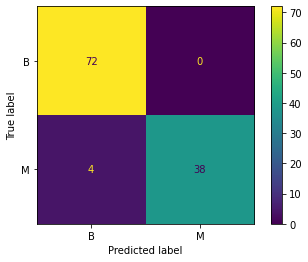

              precision    recall  f1-score   support

           B       0.95      1.00      0.97        72
           M       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114


# ====================

[[285   0]
 [  7 163]]


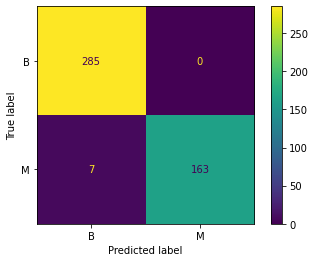

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       285
           M       1.00      0.96      0.98       170

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [81]:
y_pred_test = grid_knn.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

y_pred_train = grid_knn.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

Voltando pro recall:

In [82]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns="diagnosis")
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean", "mitkowski"],
              "knn__n_neighbors" : range(2, 31)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 174 candidates, totalling 1740 fits
[CV 1/10; 1/174] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/174] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 1/174] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/174] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 3/10; 1/174] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/174] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 1/174] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/174] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 1/174] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 5/10; 1/174] END knn__me

[CV 7/10; 5/174] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 5/174] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 8/10; 5/174] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 5/174] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 9/10; 5/174] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 10/10; 5/174] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 10/10; 5/174] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 1/10; 6/174] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance
[CV 1/10; 6/174] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 6/174] START knn__metric=manhattan, knn__n_neigh

[CV 3/10; 10/174] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 10/174] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 4/10; 10/174] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 10/174] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 5/10; 10/174] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 6/10; 10/174] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 6/10; 10/174] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 7/10; 10/174] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 7/10; 10/174] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 10/174] START knn__metric=manhatta

[CV 7/10; 14/174] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 14/174] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 8/10; 14/174] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 14/174] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 9/10; 14/174] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 14/174] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 10/10; 14/174] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 1/10; 15/174] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 1/10; 15/174] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 15/174] START knn__metric=manhatta

[CV 2/10; 19/174] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 19/174] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 3/10; 19/174] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 19/174] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 4/10; 19/174] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 19/174] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 5/10; 19/174] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 6/10; 19/174] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 6/10; 19/174] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 19/174] START knn__metric=manhatta

[CV 1/10; 24/174] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 2/10; 24/174] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 2/10; 24/174] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 24/174] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 3/10; 24/174] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 24/174] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 4/10; 24/174] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 24/174] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 5/10; 24/174] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 6/10; 24/174] START knn__metric

[CV 8/10; 28/174] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 28/174] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance
[CV 9/10; 28/174] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 28/174] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance
[CV 10/10; 28/174] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 29/174] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 1/10; 29/174] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 29/174] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 2/10; 29/174] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 29/174] START knn__metric=m

[CV 6/10; 33/174] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 33/174] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 7/10; 33/174] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 33/174] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 8/10; 33/174] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 9/10; 33/174] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 9/10; 33/174] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 33/174] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 10/10; 33/174] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 1/10; 34/174] START knn__metric=manhat

[CV 1/10; 38/174] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 2/10; 38/174] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 2/10; 38/174] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 38/174] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 3/10; 38/174] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 38/174] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 4/10; 38/174] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 38/174] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 5/10; 38/174] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 6/10; 38/174] START knn__metric

[CV 1/10; 42/174] END knn__metric=manhattan, knn__n_neighbors=22, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 2/10; 42/174] START knn__metric=manhattan, knn__n_neighbors=22, knn__weights=distance
[CV 2/10; 42/174] END knn__metric=manhattan, knn__n_neighbors=22, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 42/174] START knn__metric=manhattan, knn__n_neighbors=22, knn__weights=distance
[CV 3/10; 42/174] END knn__metric=manhattan, knn__n_neighbors=22, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 42/174] START knn__metric=manhattan, knn__n_neighbors=22, knn__weights=distance
[CV 4/10; 42/174] END knn__metric=manhattan, knn__n_neighbors=22, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 42/174] START knn__metric=manhattan, knn__n_neighbors=22, knn__weights=distance
[CV 5/10; 42/174] END knn__metric=manhattan, knn__n_neighbors=22, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 6/10; 42/174] START knn__metric

[CV 2/10; 46/174] END knn__metric=manhattan, knn__n_neighbors=24, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 46/174] START knn__metric=manhattan, knn__n_neighbors=24, knn__weights=distance
[CV 3/10; 46/174] END knn__metric=manhattan, knn__n_neighbors=24, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 46/174] START knn__metric=manhattan, knn__n_neighbors=24, knn__weights=distance
[CV 4/10; 46/174] END knn__metric=manhattan, knn__n_neighbors=24, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 46/174] START knn__metric=manhattan, knn__n_neighbors=24, knn__weights=distance
[CV 5/10; 46/174] END knn__metric=manhattan, knn__n_neighbors=24, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 6/10; 46/174] START knn__metric=manhattan, knn__n_neighbors=24, knn__weights=distance
[CV 6/10; 46/174] END knn__metric=manhattan, knn__n_neighbors=24, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 46/174] START knn__metric

[CV 3/10; 50/174] END knn__metric=manhattan, knn__n_neighbors=26, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 50/174] START knn__metric=manhattan, knn__n_neighbors=26, knn__weights=distance
[CV 4/10; 50/174] END knn__metric=manhattan, knn__n_neighbors=26, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 50/174] START knn__metric=manhattan, knn__n_neighbors=26, knn__weights=distance
[CV 5/10; 50/174] END knn__metric=manhattan, knn__n_neighbors=26, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 6/10; 50/174] START knn__metric=manhattan, knn__n_neighbors=26, knn__weights=distance
[CV 6/10; 50/174] END knn__metric=manhattan, knn__n_neighbors=26, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 50/174] START knn__metric=manhattan, knn__n_neighbors=26, knn__weights=distance
[CV 7/10; 50/174] END knn__metric=manhattan, knn__n_neighbors=26, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 50/174] START knn__metric

[CV 5/10; 54/174] END knn__metric=manhattan, knn__n_neighbors=28, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 6/10; 54/174] START knn__metric=manhattan, knn__n_neighbors=28, knn__weights=distance
[CV 6/10; 54/174] END knn__metric=manhattan, knn__n_neighbors=28, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 54/174] START knn__metric=manhattan, knn__n_neighbors=28, knn__weights=distance
[CV 7/10; 54/174] END knn__metric=manhattan, knn__n_neighbors=28, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 54/174] START knn__metric=manhattan, knn__n_neighbors=28, knn__weights=distance
[CV 8/10; 54/174] END knn__metric=manhattan, knn__n_neighbors=28, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 9/10; 54/174] START knn__metric=manhattan, knn__n_neighbors=28, knn__weights=distance
[CV 9/10; 54/174] END knn__metric=manhattan, knn__n_neighbors=28, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 10/10; 54/174] START knn__metri

[CV 6/10; 58/174] END knn__metric=manhattan, knn__n_neighbors=30, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 58/174] START knn__metric=manhattan, knn__n_neighbors=30, knn__weights=distance
[CV 7/10; 58/174] END knn__metric=manhattan, knn__n_neighbors=30, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 58/174] START knn__metric=manhattan, knn__n_neighbors=30, knn__weights=distance
[CV 8/10; 58/174] END knn__metric=manhattan, knn__n_neighbors=30, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 9/10; 58/174] START knn__metric=manhattan, knn__n_neighbors=30, knn__weights=distance
[CV 9/10; 58/174] END knn__metric=manhattan, knn__n_neighbors=30, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 10/10; 58/174] START knn__metric=manhattan, knn__n_neighbors=30, knn__weights=distance
[CV 10/10; 58/174] END knn__metric=manhattan, knn__n_neighbors=30, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 1/10; 59/174] START knn__metr

[CV 1/10; 63/174] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 2/10; 63/174] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 2/10; 63/174] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 3/10; 63/174] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 3/10; 63/174] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 63/174] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 4/10; 63/174] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 63/174] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 5/10; 63/174] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 6/10; 63/174] START knn__metric=euclidean, knn__n

[CV 3/10; 67/174] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 67/174] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 4/10; 67/174] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 67/174] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 5/10; 67/174] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 6/10; 67/174] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 6/10; 67/174] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 67/174] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 7/10; 67/174] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=0.706 total time=   0.0s
[CV 8/10; 67/174] START knn__metric=euclidean, knn__n

[CV 7/10; 71/174] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=0.706 total time=   0.0s
[CV 8/10; 71/174] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 8/10; 71/174] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 71/174] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 9/10; 71/174] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 71/174] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 10/10; 71/174] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 72/174] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 1/10; 72/174] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 72/174] START knn__metric=euclidean, kn

[CV 4/10; 76/174] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 76/174] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 5/10; 76/174] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 6/10; 76/174] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 6/10; 76/174] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 7/10; 76/174] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 7/10; 76/174] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 76/174] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 8/10; 76/174] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 76/174] START knn__metric

[CV 6/10; 81/174] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 81/174] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 7/10; 81/174] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 81/174] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 8/10; 81/174] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 81/174] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 9/10; 81/174] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 81/174] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 10/10; 81/174] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 82/174] START knn__metric=euclid

[CV 4/10; 86/174] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 86/174] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 5/10; 86/174] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 6/10; 86/174] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 6/10; 86/174] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 86/174] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 7/10; 86/174] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 86/174] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 8/10; 86/174] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 86/174] START knn__metric

[CV 3/10; 91/174] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 91/174] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 4/10; 91/174] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 91/174] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 5/10; 91/174] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 6/10; 91/174] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 6/10; 91/174] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 91/174] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 7/10; 91/174] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 91/174] START knn__metric=euclidea

[CV 2/10; 96/174] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 2/10; 96/174] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 96/174] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 3/10; 96/174] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 96/174] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 4/10; 96/174] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 96/174] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 5/10; 96/174] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 6/10; 96/174] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 6/10; 96/174] END knn__metric=euclidean, knn__n_neighbors=20, 

[CV 8/10; 100/174] END knn__metric=euclidean, knn__n_neighbors=22, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 100/174] START knn__metric=euclidean, knn__n_neighbors=22, knn__weights=distance
[CV 9/10; 100/174] END knn__metric=euclidean, knn__n_neighbors=22, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 100/174] START knn__metric=euclidean, knn__n_neighbors=22, knn__weights=distance
[CV 10/10; 100/174] END knn__metric=euclidean, knn__n_neighbors=22, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 101/174] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform
[CV 1/10; 101/174] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 101/174] START knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform
[CV 2/10; 101/174] END knn__metric=euclidean, knn__n_neighbors=23, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 101/174] START knn

[CV 7/10; 105/174] END knn__metric=euclidean, knn__n_neighbors=25, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 105/174] START knn__metric=euclidean, knn__n_neighbors=25, knn__weights=uniform
[CV 8/10; 105/174] END knn__metric=euclidean, knn__n_neighbors=25, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 9/10; 105/174] START knn__metric=euclidean, knn__n_neighbors=25, knn__weights=uniform
[CV 9/10; 105/174] END knn__metric=euclidean, knn__n_neighbors=25, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 10/10; 105/174] START knn__metric=euclidean, knn__n_neighbors=25, knn__weights=uniform
[CV 10/10; 105/174] END knn__metric=euclidean, knn__n_neighbors=25, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 106/174] START knn__metric=euclidean, knn__n_neighbors=25, knn__weights=distance
[CV 1/10; 106/174] END knn__metric=euclidean, knn__n_neighbors=25, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 2/10; 106/174] START knn__m

[CV 7/10; 110/174] END knn__metric=euclidean, knn__n_neighbors=27, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 110/174] START knn__metric=euclidean, knn__n_neighbors=27, knn__weights=distance
[CV 8/10; 110/174] END knn__metric=euclidean, knn__n_neighbors=27, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 9/10; 110/174] START knn__metric=euclidean, knn__n_neighbors=27, knn__weights=distance
[CV 9/10; 110/174] END knn__metric=euclidean, knn__n_neighbors=27, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 10/10; 110/174] START knn__metric=euclidean, knn__n_neighbors=27, knn__weights=distance
[CV 10/10; 110/174] END knn__metric=euclidean, knn__n_neighbors=27, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 111/174] START knn__metric=euclidean, knn__n_neighbors=28, knn__weights=uniform
[CV 1/10; 111/174] END knn__metric=euclidean, knn__n_neighbors=28, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 111/174] START k

[CV 2/10; 115/174] END knn__metric=euclidean, knn__n_neighbors=30, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 115/174] START knn__metric=euclidean, knn__n_neighbors=30, knn__weights=uniform
[CV 3/10; 115/174] END knn__metric=euclidean, knn__n_neighbors=30, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 115/174] START knn__metric=euclidean, knn__n_neighbors=30, knn__weights=uniform
[CV 4/10; 115/174] END knn__metric=euclidean, knn__n_neighbors=30, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 115/174] START knn__metric=euclidean, knn__n_neighbors=30, knn__weights=uniform
[CV 5/10; 115/174] END knn__metric=euclidean, knn__n_neighbors=30, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 6/10; 115/174] START knn__metric=euclidean, knn__n_neighbors=30, knn__weights=uniform
[CV 6/10; 115/174] END knn__metric=euclidean, knn__n_neighbors=30, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 115/174] START knn__metri

[CV 8/10; 121/174] END knn__metric=mitkowski, knn__n_neighbors=4, knn__weights=uniform;, score=nan total time=   0.0s
[CV 9/10; 121/174] START knn__metric=mitkowski, knn__n_neighbors=4, knn__weights=uniform
[CV 9/10; 121/174] END knn__metric=mitkowski, knn__n_neighbors=4, knn__weights=uniform;, score=nan total time=   0.0s
[CV 10/10; 121/174] START knn__metric=mitkowski, knn__n_neighbors=4, knn__weights=uniform
[CV 10/10; 121/174] END knn__metric=mitkowski, knn__n_neighbors=4, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 122/174] START knn__metric=mitkowski, knn__n_neighbors=4, knn__weights=distance
[CV 1/10; 122/174] END knn__metric=mitkowski, knn__n_neighbors=4, knn__weights=distance;, score=nan total time=   0.0s
[CV 2/10; 122/174] START knn__metric=mitkowski, knn__n_neighbors=4, knn__weights=distance
[CV 2/10; 122/174] END knn__metric=mitkowski, knn__n_neighbors=4, knn__weights=distance;, score=nan total time=   0.0s
[CV 3/10; 122/174] START knn__metric=mitkowski, 

[CV 8/10; 125/174] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=uniform;, score=nan total time=   0.0s
[CV 9/10; 125/174] START knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=uniform
[CV 9/10; 125/174] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=uniform;, score=nan total time=   0.0s
[CV 10/10; 125/174] START knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=uniform
[CV 10/10; 125/174] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=uniform;, score=nan total time=   0.0s
[CV 1/10; 126/174] START knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance
[CV 1/10; 126/174] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance;, score=nan total time=   0.0s
[CV 2/10; 126/174] START knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance
[CV 2/10; 126/174] END knn__metric=mitkowski, knn__n_neighbors=6, knn__weights=distance;, score=nan total time=   0.0s
[CV 3/10; 126/174] START knn__metric=mitkowski, 

[CV 3/10; 133/174] END knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=uniform;, score=nan total time=   0.0s
[CV 4/10; 133/174] START knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=uniform
[CV 4/10; 133/174] END knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=uniform;, score=nan total time=   0.0s
[CV 5/10; 133/174] START knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=uniform
[CV 5/10; 133/174] END knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=uniform;, score=nan total time=   0.0s
[CV 6/10; 133/174] START knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=uniform
[CV 6/10; 133/174] END knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=uniform;, score=nan total time=   0.0s
[CV 7/10; 133/174] START knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=uniform
[CV 7/10; 133/174] END knn__metric=mitkowski, knn__n_neighbors=10, knn__weights=uniform;, score=nan total time=   0.0s
[CV 8/10; 133/174] START knn__metric=mitkowsk

[CV 10/10; 140/174] END knn__metric=mitkowski, knn__n_neighbors=13, knn__weights=distance;, score=nan total time=   0.0s
[CV 1/10; 141/174] START knn__metric=mitkowski, knn__n_neighbors=14, knn__weights=uniform
[CV 1/10; 141/174] END knn__metric=mitkowski, knn__n_neighbors=14, knn__weights=uniform;, score=nan total time=   0.0s
[CV 2/10; 141/174] START knn__metric=mitkowski, knn__n_neighbors=14, knn__weights=uniform
[CV 2/10; 141/174] END knn__metric=mitkowski, knn__n_neighbors=14, knn__weights=uniform;, score=nan total time=   0.0s
[CV 3/10; 141/174] START knn__metric=mitkowski, knn__n_neighbors=14, knn__weights=uniform
[CV 3/10; 141/174] END knn__metric=mitkowski, knn__n_neighbors=14, knn__weights=uniform;, score=nan total time=   0.0s
[CV 4/10; 141/174] START knn__metric=mitkowski, knn__n_neighbors=14, knn__weights=uniform
[CV 4/10; 141/174] END knn__metric=mitkowski, knn__n_neighbors=14, knn__weights=uniform;, score=nan total time=   0.0s
[CV 5/10; 141/174] START knn__metric=mitkow

[CV 3/10; 148/174] END knn__metric=mitkowski, knn__n_neighbors=17, knn__weights=distance;, score=nan total time=   0.0s
[CV 4/10; 148/174] START knn__metric=mitkowski, knn__n_neighbors=17, knn__weights=distance
[CV 4/10; 148/174] END knn__metric=mitkowski, knn__n_neighbors=17, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 148/174] START knn__metric=mitkowski, knn__n_neighbors=17, knn__weights=distance
[CV 5/10; 148/174] END knn__metric=mitkowski, knn__n_neighbors=17, knn__weights=distance;, score=nan total time=   0.0s
[CV 6/10; 148/174] START knn__metric=mitkowski, knn__n_neighbors=17, knn__weights=distance
[CV 6/10; 148/174] END knn__metric=mitkowski, knn__n_neighbors=17, knn__weights=distance;, score=nan total time=   0.0s
[CV 7/10; 148/174] START knn__metric=mitkowski, knn__n_neighbors=17, knn__weights=distance
[CV 7/10; 148/174] END knn__metric=mitkowski, knn__n_neighbors=17, knn__weights=distance;, score=nan total time=   0.0s
[CV 8/10; 148/174] START knn__metric

[CV 2/10; 152/174] END knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance;, score=nan total time=   0.0s
[CV 3/10; 152/174] START knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance
[CV 3/10; 152/174] END knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance;, score=nan total time=   0.0s
[CV 4/10; 152/174] START knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance
[CV 4/10; 152/174] END knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 152/174] START knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance
[CV 5/10; 152/174] END knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance;, score=nan total time=   0.0s
[CV 6/10; 152/174] START knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance
[CV 6/10; 152/174] END knn__metric=mitkowski, knn__n_neighbors=19, knn__weights=distance;, score=nan total time=   0.0s
[CV 7/10; 152/174] START knn__metric

[CV 1/10; 156/174] END knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=distance;, score=nan total time=   0.0s
[CV 2/10; 156/174] START knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=distance
[CV 2/10; 156/174] END knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=distance;, score=nan total time=   0.0s
[CV 3/10; 156/174] START knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=distance
[CV 3/10; 156/174] END knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=distance;, score=nan total time=   0.0s
[CV 4/10; 156/174] START knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=distance
[CV 4/10; 156/174] END knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=distance;, score=nan total time=   0.0s
[CV 5/10; 156/174] START knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=distance
[CV 5/10; 156/174] END knn__metric=mitkowski, knn__n_neighbors=21, knn__weights=distance;, score=nan total time=   0.0s
[CV 6/10; 156/174] START knn__metric

[CV 5/10; 163/174] END knn__metric=mitkowski, knn__n_neighbors=25, knn__weights=uniform;, score=nan total time=   0.0s
[CV 6/10; 163/174] START knn__metric=mitkowski, knn__n_neighbors=25, knn__weights=uniform
[CV 6/10; 163/174] END knn__metric=mitkowski, knn__n_neighbors=25, knn__weights=uniform;, score=nan total time=   0.0s
[CV 7/10; 163/174] START knn__metric=mitkowski, knn__n_neighbors=25, knn__weights=uniform
[CV 7/10; 163/174] END knn__metric=mitkowski, knn__n_neighbors=25, knn__weights=uniform;, score=nan total time=   0.0s
[CV 8/10; 163/174] START knn__metric=mitkowski, knn__n_neighbors=25, knn__weights=uniform
[CV 8/10; 163/174] END knn__metric=mitkowski, knn__n_neighbors=25, knn__weights=uniform;, score=nan total time=   0.0s
[CV 9/10; 163/174] START knn__metric=mitkowski, knn__n_neighbors=25, knn__weights=uniform
[CV 9/10; 163/174] END knn__metric=mitkowski, knn__n_neighbors=25, knn__weights=uniform;, score=nan total time=   0.0s
[CV 10/10; 163/174] START knn__metric=mitkows

[CV 10/10; 170/174] END knn__metric=mitkowski, knn__n_neighbors=28, knn__weights=distance;, score=nan total time=   0.0s
[CV 1/10; 171/174] START knn__metric=mitkowski, knn__n_neighbors=29, knn__weights=uniform
[CV 1/10; 171/174] END knn__metric=mitkowski, knn__n_neighbors=29, knn__weights=uniform;, score=nan total time=   0.0s
[CV 2/10; 171/174] START knn__metric=mitkowski, knn__n_neighbors=29, knn__weights=uniform
[CV 2/10; 171/174] END knn__metric=mitkowski, knn__n_neighbors=29, knn__weights=uniform;, score=nan total time=   0.0s
[CV 3/10; 171/174] START knn__metric=mitkowski, knn__n_neighbors=29, knn__weights=uniform
[CV 3/10; 171/174] END knn__metric=mitkowski, knn__n_neighbors=29, knn__weights=uniform;, score=nan total time=   0.0s
[CV 4/10; 171/174] START knn__metric=mitkowski, knn__n_neighbors=29, knn__weights=uniform
[CV 4/10; 171/174] END knn__metric=mitkowski, knn__n_neighbors=29, knn__weights=uniform;, score=nan total time=   0.0s
[CV 5/10; 171/174] START knn__metric=mitkow

C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
580 fits failed out of a total of 1740.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
580 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_class

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean', 'mitkowski'],
                         'knn__n_neighbors': range(2, 31),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, pos_label=M), verbose=10)

In [85]:
grid_knn.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}

[[71  1]
 [ 3 39]]


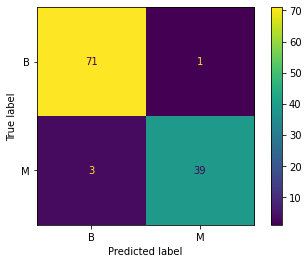

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


# ====================

[[285   0]
 [  7 163]]


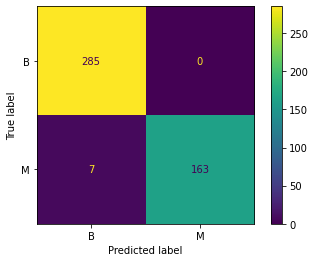

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       285
           M       1.00      0.96      0.98       170

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [83]:
y_pred_test = grid_knn.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

y_pred_train = grid_knn.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

## Exercício

2 - Vamos revisitar o exercício do insurance, agora nosso objetivo é utilizar o GridSearch para otimizar o número k de vizinhos, bem como qual dos tipos de weights e metrics para maximizar a acurácia.

#### Passo a passo

1 - Faça a leitura do dataset e escolha as features

2 - Efetue o train test split

3 - Defina as etapas do pipeline

4 - Instancie o pipeline

5 - Faça a divisão dos folds

6 - Defina as métricas que o GridSearch irá avaliar

7 - Instanciar o GridSearch

8 - Fazer o fit do GridSearch

9 - Avalie os resultados

In [86]:
df = pd.read_csv('../datasets/insurance.csv')

df['target'] = np.where(df['charges'] < 10000, 0, np.where(df['charges'] < 30000, 1, 2))

In [87]:
df['flag_sex'] = np.where(df['sex'] == 'female', 1, 0)
df['is_smoker'] = np.where(df['smoker']=='yes', 1,0 )

In [88]:
X = df.drop(['charges', 'target', 'sex', 'smoker', 'region'], axis=1)
y = df['target']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

## ========================

lista_etapas = [('std_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

## =========================

splitter = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

metrica = make_scorer(accuracy_score)

## =========================

param_grid= {"knn__weights" : ['uniform', 'distance'],
           "knn__algorithm" : ['ball_tree', 'brute', 'kd_tree'],
           "knn__metric" : ['manhattan', 'euclidean', 'mitkowski'],
           "knn__n_neighbors" : range(2, 31)}

grid_knn_paral = GridSearchCV(estimator=pipe,
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10,
                        n_jobs=-1)

grid_knn_paral.fit(X_train, y_train)

Fitting 20 folds for each of 522 candidates, totalling 10440 fits


C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3480 fits failed out of a total of 10440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Inspira\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_cl

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__algorithm': ['ball_tree', 'brute', 'kd_tree'],
                         'knn__metric': ['manhattan', 'euclidean', 'mitkowski'],
                         'knn__n_neighbors': range(2, 31),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(accuracy_score), verbose=10)

In [96]:
grid_knn.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(algorithm='ball_tree', metric='manhattan',
                                      n_neighbors=26, weights='distance'))])

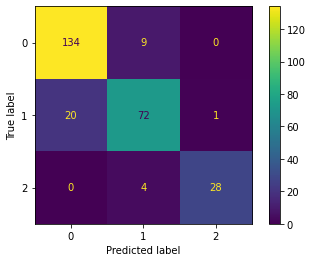

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       143
           1       0.85      0.77      0.81        93
           2       0.97      0.88      0.92        32

    accuracy                           0.87       268
   macro avg       0.89      0.86      0.88       268
weighted avg       0.87      0.87      0.87       268



In [99]:
y_pred = grid_knn.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

print(classification_report(y_test, y_pred))

____
____
____

## 3) KNN para regressão

O KNN é nosso primeiro exemplo de algoritmo que pode ser utilizado para ambos os problemas de classificação e regressão!

A ideia é bem simples: o target atribuído a uma nova observação é igual à **média do target das $k$ observações mais próximas**

<img src="https://bookdown.org/f100441618/bookdown-regresion/www/KNN.jpg" width=500>

Naturalmente, também para regressão o parâmetro $k$ e a métrica de distância são hiperparâmetros importantes:

<img src="https://i.stack.imgur.com/gAILq.png" width=500>

A classe no sklearn é a [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html). Dê uma olhada no User Guide e também no [RadiusNeighborsRegressor!](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html#sklearn.neighbors.RadiusNeighborsRegressor)

In [100]:
from sklearn.neighbors import KNeighborsRegressor

In [101]:
df_houses = pd.read_csv("house_prices.csv")
df_houses = df_houses.select_dtypes(include=np.number).dropna()

X = df_houses.drop(columns=["Id", "SalePrice"])
y = df_houses["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [102]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsRegressor())]

pipe = Pipeline(lista_etapas)

# ====================

# aqui, kfold normal pq nao tem classe pra estratificar
splitter = KFold(n_splits=10, shuffle=True, random_state=42)

metrica = "neg_mean_absolute_error"

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(2, 21)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn_reg = GridSearchCV(estimator=pipe, 
                            param_grid=param_grid,
                            scoring=metrica,
                            cv=splitter,
                            verbose=10,
                            n_jobs=-1)

grid_knn_reg.fit(X_train, y_train)

Fitting 10 folds for each of 76 candidates, totalling 760 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=10)

In [103]:
grid_knn_reg.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 8, 'knn__weights': 'distance'}

In [104]:
grid_knn_reg.best_score_

-20297.192189179004

In [105]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = grid_knn_reg.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = grid_knn_reg.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 


Métricas de treino:

R^2: 1.00
MAE: 0.00
RMSE: 0.00

Métricas de teste:

R^2: 0.81
MAE: 20875.14
RMSE: 38970.95


Limitando o k, pra fugir de overfitting

In [106]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsRegressor())]

pipe = Pipeline(lista_etapas)

# ====================

# aqui, kfold normal pq nao tem classe pra estratificar
splitter = KFold(n_splits=10, shuffle=True, random_state=42)

metrica = "neg_mean_absolute_error"

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(50, 80)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn_reg = GridSearchCV(estimator=pipe, 
                            param_grid=param_grid,
                            scoring=metrica,
                            cv=splitter,
                            verbose=10,
                            n_jobs=-1)

grid_knn_reg.fit(X_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(50, 80),
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=10)

In [107]:
# predições de treino
y_pred_train = grid_knn_reg.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = grid_knn_reg.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 


Métricas de treino:

R^2: 1.00
MAE: 0.00
RMSE: 0.00

Métricas de teste:

R^2: 0.72
MAE: 24188.16
RMSE: 47304.49


## Exercício para aula que vem

3 - Vamos fazer a regressão do exercício 1 (house_prices) utilizando o KNN com GridSearch

#### Passo a passo

1 - Faça a leitura do dataset e escolha as features (relembre da resolução do exercicio em aula)

2 - Efetue o train test split

3 - Defina as etapas do pipeline, aqui o estimador deve ser o KNeighborsRegressor

4 - Instancie o pipeline

5 - Faça a divisão dos folds

6 - Defina as métricas que o GridSearch irá avaliar

7 - Instanciar o GridSearch

8 - Fazer o fit do GridSearch

9 - Avalie os resultados